In [62]:
#List of dependencies - Use as needed

import matplotlib.pyplot as plt # Create plots
import numpy as np # mathematical manipulations
from scipy import stats as st #- stats and probability
from pathlib import Path # Link to csv-files
import pandas as pd # Read csv files
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable # Used to add the colourbar to scatterplot subplots
import matplotlib.cm as cm                              # Used for colourbar on scatterplot subplots

### CSV files for rainfall and temp

In [63]:
# Opening CSV files as dataframes

#Dubbo Temp
csvpath = os.path.join('.','Resources', 'Dubbo_NSW_BOM', 'Dubbo_Anuual_Mean_Max_Temp.csv')
df_1 = pd.read_csv(csvpath)
df_1= df_1[['Year','Annual']]

#Dubbo Rain
csvpath = os.path.join('.','Resources', 'Dubbo_NSW_BOM', 'Dubbo_Annual_Rainfall.csv')
df_2 = pd.read_csv(csvpath)
df_2 = df_2[['Year','Annual']]

#Cairns Temp
csvpath = os.path.join('.','Resources', 'Cairns_QL_BOM', 'Cairns_Annual_Mean_Max_Temp.csv')
df_3= pd.read_csv(csvpath)
df_3= df_3[['Year','Annual']]

#Cairns Rain
csvpath = os.path.join('.','Resources', 'Cairns_QL_BOM', 'Cairns_Annual_Rainfall.csv')
df_4 = pd.read_csv(csvpath)
df_4 = df_4[['Year','Annual']]

#Wangaratta Temp
csvpath = os.path.join('.','Resources', 'Wangaratta_VIC_BOM', 'Wangaratta_Annual_Mean_Max_Temp.csv')
df_5= pd.read_csv(csvpath)
df_5 = df_5[['Year','Annual']]

#Wangaratta Rain
csvpath = os.path.join('.','Resources', 'Wangaratta_VIC_BOM', 'Wangaratta_Annual_Rain.csv')
df_6 = pd.read_csv(csvpath)
df_6= df_6[['Year','Annual']]

#Coffin Bay SA Temp Note: Wanilla closest location found
csvpath = os.path.join('.','Resources', 'CoffinBay_SA_BOM', 'Wanilla_Annual_Mean_Max_Temp.csv')
df_7 = pd.read_csv(csvpath)
df_7 = df_7[['Year','Annual']]

#Coffin Bay SA Rain Note: Wanilla closest location found
csvpath = os.path.join('.','Resources', 'CoffinBay_SA_BOM', 'Wanilla_Annual_Rainfall.csv')
df_8 = pd.read_csv(csvpath)
df_8 = df_8[['Year','Annual']]

#Northam WA Temp
csvpath = os.path.join('.','Resources', 'Northam_WA_BOM', 'Northam_Annual_Mean_Max_Temp.csv')
df_9 = pd.read_csv(csvpath)
df_9 = df_9[['Year','Annual']]

#Northam WA Rain
csvpath = os.path.join('.','Resources', 'Northam_WA_BOM', 'Northam_Annual_Rainfall.csv')
df_10 = pd.read_csv(csvpath)
df_10 = df_10[['Year','Annual']]



Merging Temp and Rainfall CSVs

In [64]:
Initial_merge = pd.merge(df_1, df_2, how="left", on=['Year'])
Initial_merge = Initial_merge.rename(columns= {"Annual_x":"NSW Annual Max Mean Temp",
                                                "Annual_y":"NSW Annual Rainfall"})

Second_merge = pd.merge(Initial_merge, df_3, how="left", on=['Year'])
Second_merge = Second_merge.rename(columns= {"Annual":"QL Annual Max Mean Temp"})

Third_merge = pd.merge(Second_merge, df_4, how="left", on=['Year'])
Third_merge = Third_merge.rename(columns= {"Annual":"QL Annual Rainfall"})

Fourth_merge = pd.merge(Third_merge, df_5, how="left", on=['Year'])
Fourth_merge = Fourth_merge.rename(columns= {"Annual":"VIC Annual Max Mean Temp"})

Fifth_merge = pd.merge(Fourth_merge, df_6, how="left", on=['Year'])
Fifth_merge = Fifth_merge.rename(columns= {"Annual":"VIC Annual Rainfall"})

Sixth_merge = pd.merge(Fifth_merge, df_7, how="left", on=['Year'])
Sixth_merge = Sixth_merge.rename(columns= {"Annual":"SA Annual Max Mean Temp"})

Seventh_merge = pd.merge(Sixth_merge, df_8, how="left", on=['Year'])
Seventh_merge = Seventh_merge.rename(columns= {"Annual":"SA Annual Rainfall"})

Eight_merge = pd.merge(Seventh_merge, df_9, how="left", on=['Year'])
Eight_merge = Eight_merge.rename(columns= {"Annual":"WA Annual Max Mean Temp"})

Temp_Rain_df = pd.merge(Eight_merge, df_10, how="left", on=['Year'])
Temp_Rain_df= Temp_Rain_df.rename(columns= {"Annual":"WA Annual Rainfall"})
Temp_Rain_df.head()


,Year,NSW Annual Max Mean Temp,NSW Annual Rainfall,QL Annual Max Mean Temp,QL Annual Rainfall,VIC Annual Max Mean Temp,VIC Annual Rainfall,SA Annual Max Mean Temp,SA Annual Rainfall,WA Annual Max Mean Temp,WA Annual Rainfall
0,1993,23.4,NaN,28.8,1574.2,21.1,856.8,21.9,NaN,25.4,320.9
1,1994,24.3,NaN,29.1,1990.4,21.8,485.5,21.8,NaN,27.0,282.2
2,1995,23.6,NaN,29.4,2074.8,20.7,824.9,20.3,379.8,25.6,554.4
3,1996,23.3,NaN,29.3,2083.0,20.6,781.1,20.3,364.0,25.6,478.1
4,1997,25.0,NaN,28.6,1899.8,22.8,385.0,20.6,349.2,25.4,394.6


In [65]:
#Fill in NA values close to max year (Average of 2 prior years) **Note- AI assisted
df_filled = Temp_Rain_df.fillna((Temp_Rain_df.shift() + Temp_Rain_df.shift(-1)) / 2)
rolling_mean = df_filled.rolling(3, min_periods=1).mean().shift(2)
filled_df = df_filled.fillna(rolling_mean.round())
filled_df.head()

,Year,NSW Annual Max Mean Temp,NSW Annual Rainfall,QL Annual Max Mean Temp,QL Annual Rainfall,VIC Annual Max Mean Temp,VIC Annual Rainfall,SA Annual Max Mean Temp,SA Annual Rainfall,WA Annual Max Mean Temp,WA Annual Rainfall
0,1993,23.4,NaN,28.8,1574.2,21.1,856.8,21.9,NaN,25.4,320.9
1,1994,24.3,NaN,29.1,1990.4,21.8,485.5,21.8,NaN,27.0,282.2
2,1995,23.6,NaN,29.4,2074.8,20.7,824.9,20.3,379.8,25.6,554.4
3,1996,23.3,NaN,29.3,2083.0,20.6,781.1,20.3,364.0,25.6,478.1
4,1997,25.0,NaN,28.6,1899.8,22.8,385.0,20.6,349.2,25.4,394.6


Rainfall specific dataframe

In [66]:
rainfall_df = filled_df[['Year', 'NSW Annual Rainfall', 'QL Annual Rainfall', 'VIC Annual Rainfall', 'SA Annual Rainfall', 'WA Annual Rainfall']]
rain_df_2000 = rainfall_df[rainfall_df['Year'] > 1999]
rain_df_2000.head()

#Creating rainfall specific DataFrame (usable from 2017 onwards)
rain_df_2017 = rainfall_df[rainfall_df['Year'] > 2016]

In [67]:
#Creating weather df
temp_df = filled_df[['Year', 'NSW Annual Max Mean Temp', 'QL Annual Max Mean Temp', 'VIC Annual Max Mean Temp', 'SA Annual Max Mean Temp', 'WA Annual Max Mean Temp']]
temp_df_2000 = temp_df.loc[temp_df['Year'] > 1999]
temp_df_2017 = temp_df.loc[temp_df['Year'] > 2016]
temp_df.head()
#temp_df_2017

,Year,NSW Annual Max Mean Temp,QL Annual Max Mean Temp,VIC Annual Max Mean Temp,SA Annual Max Mean Temp,WA Annual Max Mean Temp
0,1993,23.4,28.8,21.1,21.9,25.4
1,1994,24.3,29.1,21.8,21.8,27.0
2,1995,23.6,29.4,20.7,20.3,25.6
3,1996,23.3,29.3,20.6,20.3,25.6
4,1997,25.0,28.6,22.8,20.6,25.4


## Setting up climate change data

In [68]:
#Reading csv
climate_df = pd.read_csv('Resources/Temperature_change_oceania_1960.csv', encoding = "ISO-8859-1")
australian_climate = climate_df.loc[climate_df['Area'] == 'Australia'].reset_index()
australian_climate = climate_df.drop(columns=['Area Code', 'Area Code (M49)', 'Area', "Months Code", 'Element Code'])
australian_climate.head()

climate_change = pd.read_csv('Resources/Temperature_change_oceania_1960.csv', encoding = "ISO-8859-1")

climate_change = climate_change.loc[(climate_change["Area"] == 'Australia') &
                                    (climate_change["Element"] != "Standard Deviation") &
                                    (climate_change["Months"] == 'Meteorological year')]

In [69]:
#Organising df (2017 and 1990)
climate_change_2017 = climate_change.rename(columns= {"Y2016":"2017-18",
                                                 "Y2017":"2018-19",
                                                 "Y2018":"2019-20",
                                                 "Y2019":"2020-21",
                                                 "Y2020":"2021-22",
                                                 "Y2021":"2022-23",
                                                 "Y2022":"2023-24"})

climate_change_1990 = climate_change.rename(columns= {"Y1990":"1990", "Y1991":"1991", "Y1992":"1992","Y1993":"1993","Y1994":"1994", "Y1995":"1995","Y1996":"1996","Y1997":"1997",
                                                       "Y1998":"1998","Y1999":"1999","Y2000":"2000", "Y2001":"2001", "Y2002":"2002","Y2003":"2003","Y2004":"2004","Y2005":"2005",
                                                       "Y2006":"2006","Y2007":"2007", "Y2008":"2008","Y2009":"2009","Y2010":"2010","Y2011":"2011","Y2012":"2012","Y2013":"2013",
                                                       "Y2014":"2014","Y2015":"2015", "Y2016":"2016","Y2017":"2017","Y2018":"2018","Y2019":"2019","Y2020":"2020","Y2021":"2021", "Y2022":"2022",})

In [70]:
climate_change_new_2017 = climate_change_2017[["2017-18","2018-19","2019-20","2020-21", "2021-22","2022-23", "2023-24"]]
climate_change_new_2017 = climate_change_new_2017.T
climate_change_new_2017 = climate_change_new_2017.rename(columns= {66:"Climate Change Value"})


climate_change_new_1990 = climate_change_1990[["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000", 
                                               "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010",
                                               "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020","2021","2022"]]
climate_change_new_1990 = climate_change_new_1990.T
climate_change_new_1990 = climate_change_new_1990.rename(columns= {66:"Climate Change Value"})

climate_change_new_1990.head()

,Climate Change Value
1990,0.549
1991,0.820
1992,0.281
1993,0.484
1994,0.221


In [71]:
#Reset index and gain a year column
climate_change_new_2017["Year"] = climate_change_new_2017.index
climate_change_new_2017 = climate_change_new_2017.reset_index(drop=True)
climate_change_new_2017.head()

climate_change_new_1990["Year"] = climate_change_new_1990.index
climate_change_new_1990 = climate_change_new_1990.reset_index(drop=True)
climate_change_new_1990.head()

,Climate Change Value,Year
0,0.549,1990
1,0.820,1991
2,0.281,1992
3,0.484,1993
4,0.221,1994


## Section 1.1 Univariate climate change plots

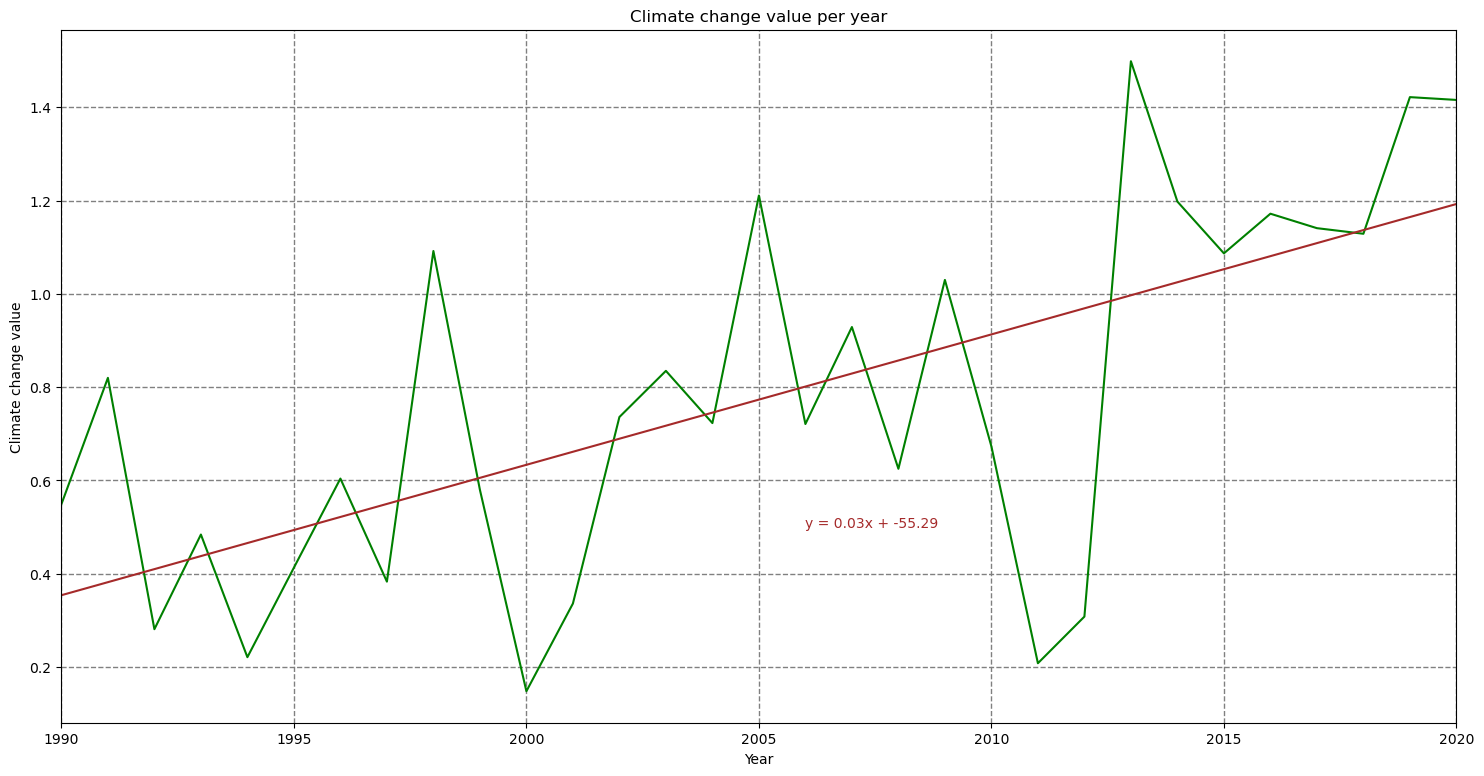

In [103]:
x_values = np.arange(1990.0,2021.0,1.0)
y_values = climate_change_new_1990['Climate Change Value'].to_numpy()
climate_graph = plt.figure()
climate_graph.set_figheight(9)
climate_graph.set_figwidth(18)
plt.plot(x_values, y_values, 'g-')
plt.title('Climate change value per year')
plt.xlabel('Year')
plt.ylabel('Climate change value')
plt.xlim(1990, 2020)
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.plot(figsize=(20,20))

#liner regression
(climate_slope, climate_intercept, climate_rvalue, climate_pvalue, climate_stderr) = st.linregress(x_values, y_values)
climate_regress = x_values * climate_slope + climate_intercept
plt.annotate(f"y = {round(climate_slope,2)}x + {round(climate_intercept,2)}", xy=(2006,0.5), xycoords='data', color='brown')
plt.plot(x_values,climate_regress,"brown")

plt.show()

## Section 1.2 - Univariate rainfall plots

C:\Users\bosb0\AppData\Local\Temp\ipykernel_30700\818709744.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  nsw_colourbar.ax.set_yticklabels(nsw_temp_range)
C:\Users\bosb0\AppData\Local\Temp\ipykernel_30700\818709744.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  qld_colourbar.ax.set_yticklabels(qld_temp_range)
C:\Users\bosb0\AppData\Local\Temp\ipykernel_30700\818709744.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  vic_colourbar.ax.set_yticklabels(vic_temp_range)
C:\Users\bosb0\AppData\Local\Temp\ipykernel_30700\818709744.py:126: UserWarning: FixedFormatter should only be used together with FixedLocator
  sa_colourbar.ax.set_yticklabels(sa_temp_range)
C:\Users\bosb0\AppData\Local\Temp\ipykernel_30700\818709744.py:148: UserWarning: FixedFormatter should only be used together with FixedLocator
  wa_colourbar.ax.set_yticklabels(wa_temp_range)


[Text(1, 0.0, '24.7'),
 Text(1, 0.2, '25.1'),
 Text(1, 0.4, '25.5'),
 Text(1, 0.6000000000000001, '25.9'),
 Text(1, 0.8, '26.3'),
 Text(1, 1.0, '26.7')]

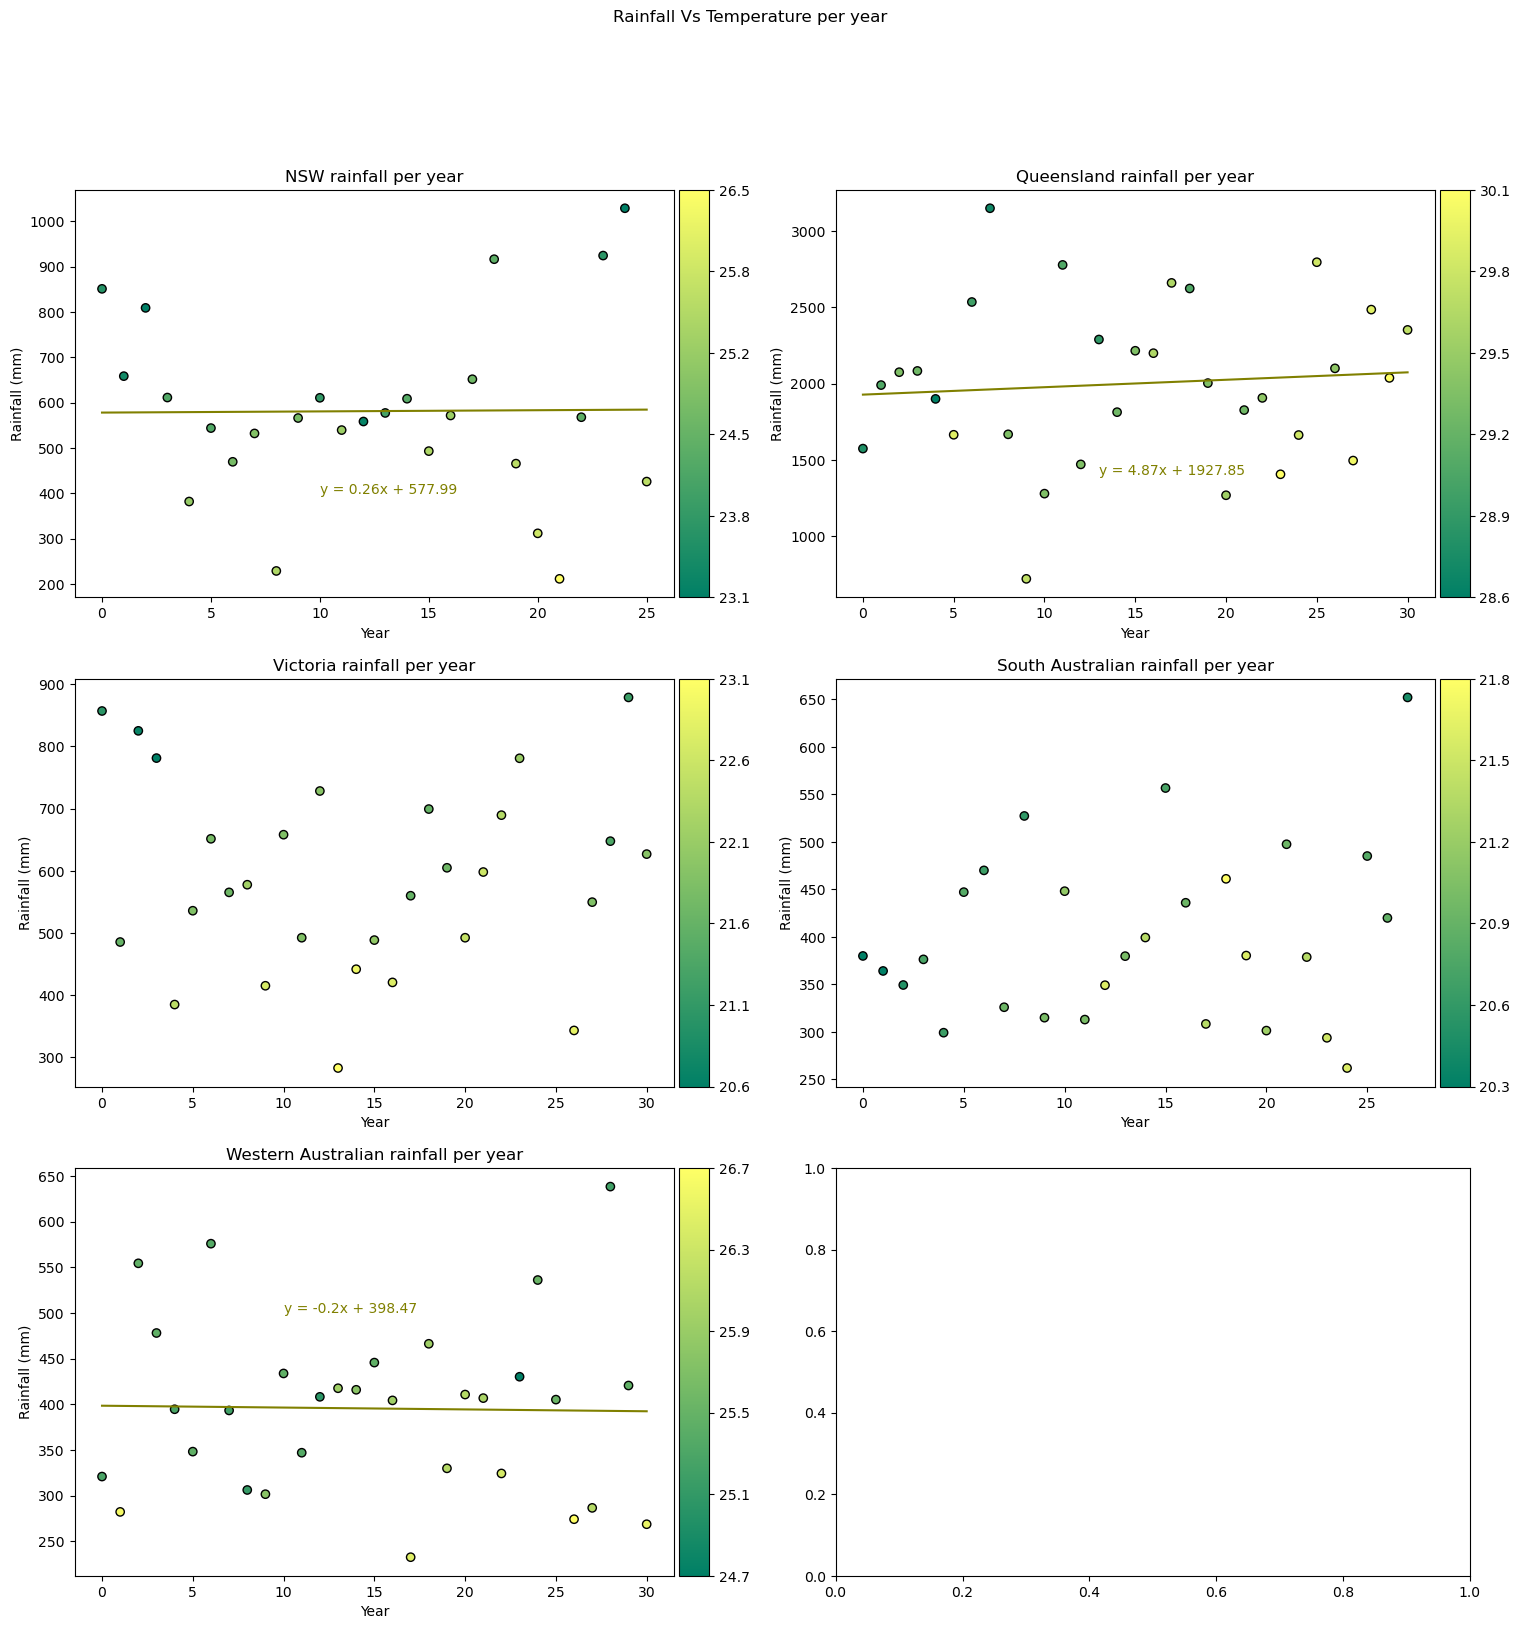

In [73]:
# Creating x values (NSW and SA have modified x values to cull NaN values)
x_values = np.arange(0,31,1)
nsw_x_val = np.arange(0,26,1)
sa_x_val = np.arange(0,29,1)

# Creating y  values
nsw_y_val = df_filled['NSW Annual Rainfall'].iloc[5:].to_numpy()  # using iloc to remove the NaN values
qld_y_val = df_filled['QL Annual Rainfall'].to_numpy()
vic_y_val = df_filled['VIC Annual Rainfall'].to_numpy()
sa_y_val = df_filled['SA Annual Rainfall'].iloc[2:].to_numpy()  # using iloc to remove the NaN values
wa_y_val = df_filled['WA Annual Rainfall'].to_numpy()

# Creating s values
nsw_s_val = df_filled['NSW Annual Max Mean Temp'].iloc[5:].to_numpy()  # using iloc to remove the NaN values
qld_s_val = df_filled['QL Annual Max Mean Temp'].to_numpy()
vic_s_val = df_filled['VIC Annual Max Mean Temp'].to_numpy()
sa_s_val = df_filled['SA Annual Max Mean Temp'].iloc[2:].to_numpy()  # using iloc to remove the NaN values
wa_s_val = df_filled['WA Annual Max Mean Temp'].to_numpy()

# Creating temperature ranges for colourbar
nsw_temp_range = np.arange(nsw_s_val.min(), nsw_s_val.max(), (nsw_s_val.max()-nsw_s_val.min())/6)
nsw_temp_range = [round(x,1) for x in nsw_temp_range]
qld_temp_range = np.arange(qld_s_val.min(), qld_s_val.max(), round((qld_s_val.max()-qld_s_val.min())/6,1))
qld_temp_range = [round(x,1) for x in qld_temp_range]
vic_temp_range = np.arange(vic_s_val.min(), vic_s_val.max(), round((vic_s_val.max()-vic_s_val.min())/6,1))
vic_temp_range = [round(x,1) for x in vic_temp_range]
sa_temp_range = np.arange(sa_s_val.min(), sa_s_val.max(), round((sa_s_val.max()-sa_s_val.min())/6,1))
sa_temp_range = [round(x,1) for x in sa_temp_range]
wa_temp_range = np.arange(wa_s_val.min(), wa_s_val.max(), round((wa_s_val.max()-wa_s_val.min())/6,1))
wa_temp_range = [round(x,1) for x in wa_temp_range]

#---------------------------

# Create Main plot
fig, axs = plt.subplots(3, 2)
fig.suptitle('Rainfall Vs Temperature per year')
fig.set_figheight(18)
fig.set_figwidth(18)

#---------------------------

# NSW plot
axs[0,0].scatter(nsw_x_val, nsw_y_val, c=nsw_s_val, cmap='summer', edgecolors='black')
axs[0,0].set_title('NSW rainfall per year')
axs[0,0].set_ylabel('Rainfall (mm)')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks([0,5,10,15,20,25])

# NSW liner regression
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_val, nsw_y_val)
nsw_regress = nsw_x_val * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(10,400), xycoords='data', color='Olive')
axs[0,0].plot(nsw_x_val,nsw_regress,"Olive")


# Creating a divider for the colourbar
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
nsw_colourbar = fig.colorbar(cm.ScalarMappable(cmap='summer'), cax=cax, orientation='vertical')
nsw_colourbar.ax.set_yticklabels(nsw_temp_range)

#---------------------------

# QLD plot
axs[0,1].scatter(x_values, qld_y_val, c=qld_s_val, cmap='summer', edgecolors='black')
axs[0,1].set_title('Queensland rainfall per year')
axs[0,1].set_ylabel('Rainfall (mm)')
axs[0,1].set_xlabel('Year')

# QLD liner regression
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(x_values, qld_y_val)
qld_regress = x_values * qld_slope + qld_intercept
axs[0,1].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(13,1400), xycoords='data', color='Olive')
axs[0,1].plot(x_values,qld_regress,"Olive")


# Creating a divider for the colourbar
divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
qld_colourbar = fig.colorbar(cm.ScalarMappable(cmap='summer'), cax=cax, orientation='vertical')
qld_colourbar.ax.set_yticklabels(qld_temp_range)

#---------------------------

# VIC plot
axs[1,0].scatter(x_values, vic_y_val, c=vic_s_val, cmap='summer', edgecolors='black')
axs[1,0].set_title('Victoria rainfall per year')
axs[1,0].set_ylabel('Rainfall (mm)')
axs[1,0].set_xlabel('Year')

# VIC liner regression
# This can't be done in time as there are NaN values in the data somehow
# (vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(x_values, vic_y_val)
# vic_regress = x_values * vic_slope + vic_intercept
# print(st.linregress(x_values, vic_y_val))
# axs[1,0].annotate(f"y = {vic_slope}x + {vic_intercept}", xy=(10,400), xycoords='data', color='Olive')
# axs[1,0].plot(x_values,vic_regress,"Olive")


# Creating a divider for the colourbar
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
vic_colourbar = fig.colorbar(cm.ScalarMappable(cmap='summer'), cax=cax, orientation='vertical')
vic_colourbar.ax.set_yticklabels(vic_temp_range)

#---------------------------

# SA plot
axs[1,1].scatter(sa_x_val, sa_y_val, c=sa_s_val, cmap='summer', edgecolors='black')
axs[1,1].set_title('South Australian rainfall per year')
axs[1,1].set_ylabel('Rainfall (mm)')
axs[1,1].set_xlabel('Year')

# SA liner regression
# This can't be done in time as there are NaN values in the data somehow
# (sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_val, sa_y_val)
# sa_regress = sa_x_val * sa_slope + sa_intercept
# axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(10,400), xycoords='data', color='Olive')
# axs[1,1].plot(sa_x_val,sa_regress,"Olive")


# Creating a divider for the colourbar
divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
sa_colourbar = fig.colorbar(cm.ScalarMappable(cmap='summer'), cax=cax, orientation='vertical')
sa_colourbar.ax.set_yticklabels(sa_temp_range)

#---------------------------

# WA plot
axs[2,0].scatter(x_values, wa_y_val, c=wa_s_val, cmap='summer', edgecolors='black')
axs[2,0].set_title('Western Australian rainfall per year')
axs[2,0].set_ylabel('Rainfall (mm)')
axs[2,0].set_xlabel('Year')


# WA liner regression
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(x_values, wa_y_val)
wa_regress = x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(10,500), xycoords='data', color='Olive')
axs[2,0].plot(x_values,wa_regress,"Olive")


# Creating a divider for the colourbar
divider = make_axes_locatable(axs[2,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
wa_colourbar = fig.colorbar(cm.ScalarMappable(cmap='summer'), cax=cax, orientation='vertical')
wa_colourbar.ax.set_yticklabels(wa_temp_range)

## Section 1.4 - Climate change against temp

In [74]:
climate_change_new_1990['Year'] = climate_change_new_1990['Year'].astype(float)
climate_2000 = climate_change_new_1990.loc[climate_change_new_1990["Year"] > 1999]

In [75]:
climate_2000['Year'] = climate_2000['Year'].astype(int)

cc_weather = pd.merge(climate_2000, temp_df_2000, how='left', on='Year')
cc_weather.head()

C:\Users\bosb0\AppData\Local\Temp\ipykernel_30700\3395664492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_2000['Year'] = climate_2000['Year'].astype(int)


,Climate Change Value,Year,NSW Annual Max Mean Temp,QL Annual Max Mean Temp,VIC Annual Max Mean Temp,SA Annual Max Mean Temp,WA Annual Max Mean Temp
0,0.148,2000,23.1,28.7,21.9,21.0,25.3
1,0.336,2001,24.4,29.4,22.5,20.8,25.2
2,0.736,2002,25.5,29.8,23.1,21.2,26.0
3,0.835,2003,24.4,29.4,22.1,20.7,25.6
4,0.723,2004,25.0,29.1,22.1,21.3,25.5


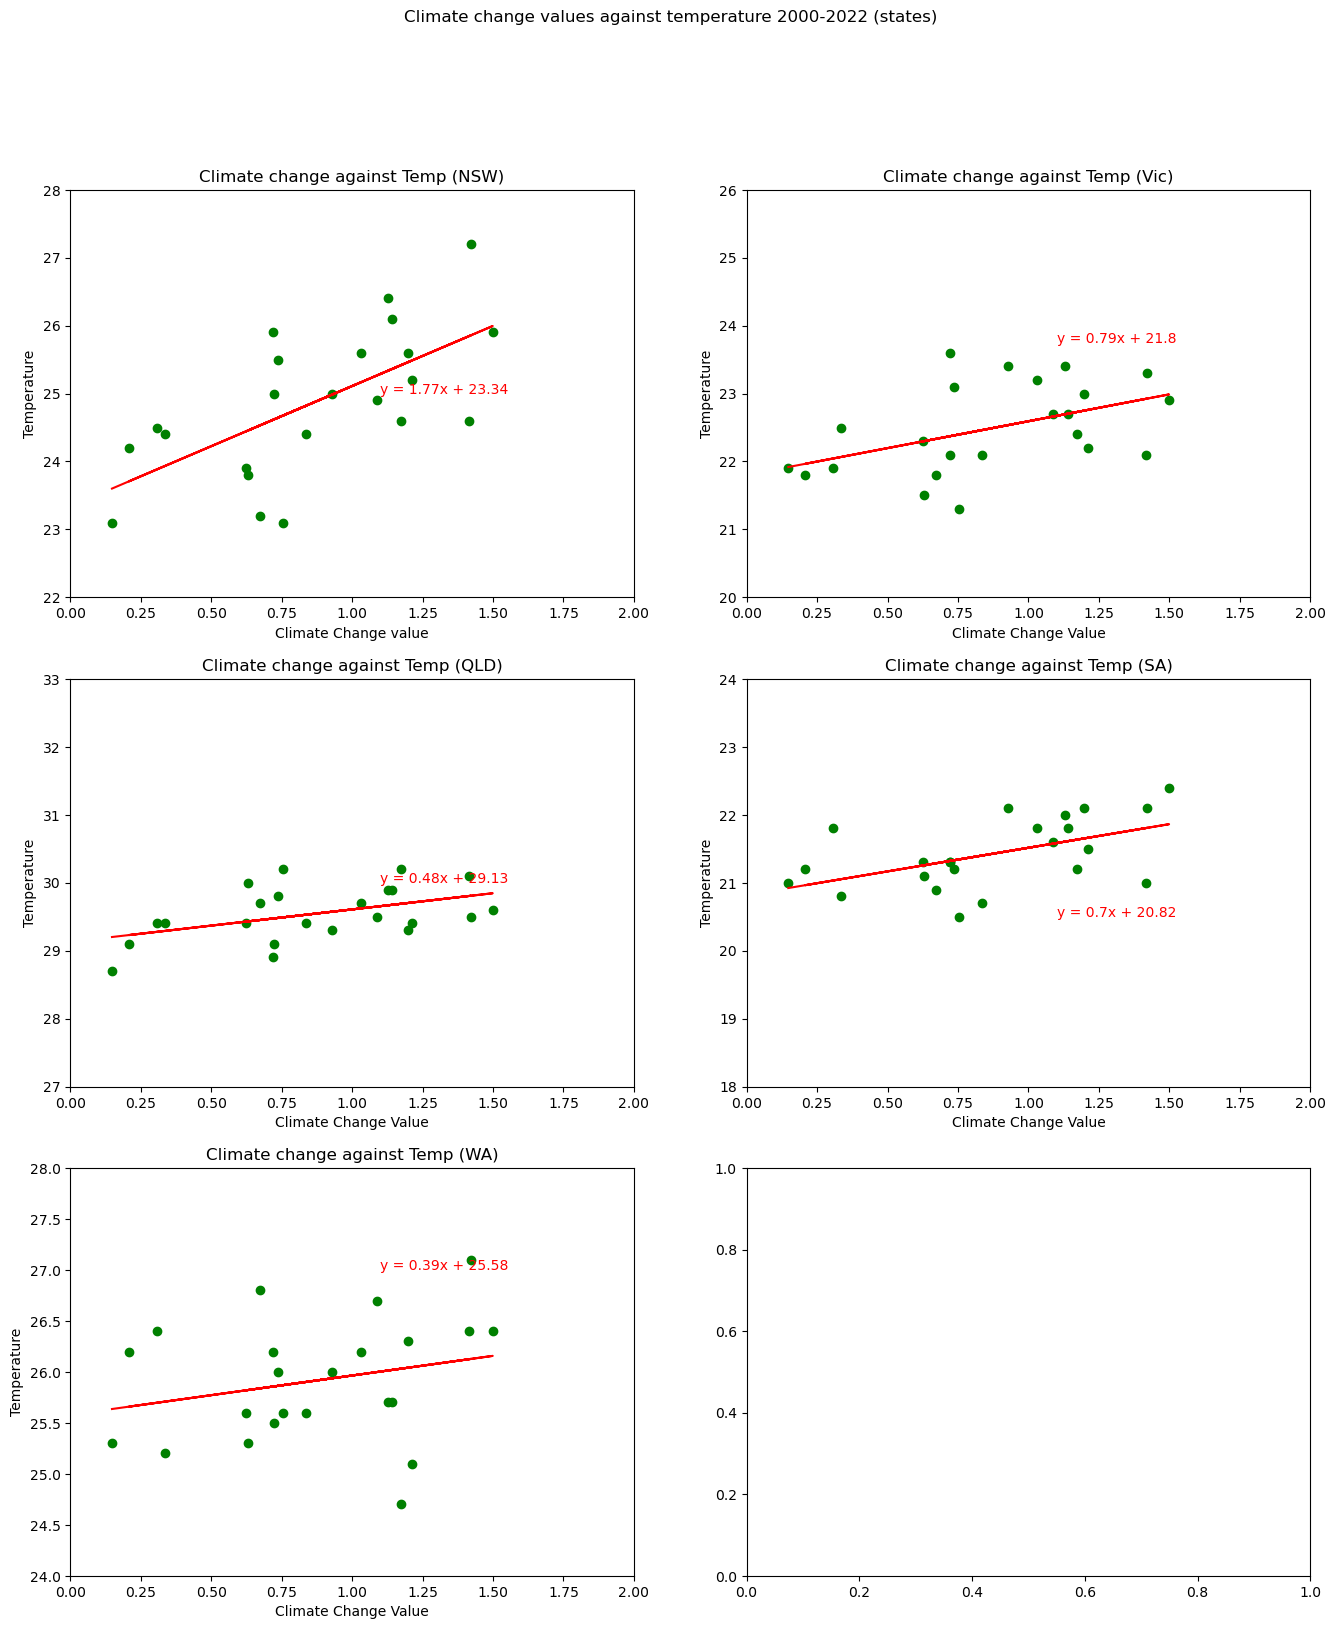

In [89]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Climate change values against temperature 2000-2022 (states)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(cc_weather['Climate Change Value'], cc_weather['NSW Annual Max Mean Temp'], c='green')
axs[0,0].set_title('Climate change against Temp (NSW)')
axs[0,0].set_ylabel('Temperature')
axs[0,0].set_xlabel('Climate Change value')
axs[0,0].set_xlim(0, 2)
axs[0,0].set_ylim(22, 28)

# NSW linear regression
nsw_x_values = cc_weather['Climate Change Value']
nsw_y_values = cc_weather['NSW Annual Max Mean Temp']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(1.1,25), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(cc_weather['Climate Change Value'], cc_weather['VIC Annual Max Mean Temp'], c='green')
axs[0,1].set_title('Climate change against Temp (Vic)')
axs[0,1].set_ylabel('Temperature')
axs[0,1].set_xlabel('Climate Change Value')
axs[0,1].set_xlim(0, 2)
axs[0,1].set_ylim(20, 26)

# VIC linear regression
vic_x_values = cc_weather['Climate Change Value']
vic_y_values = cc_weather['VIC Annual Max Mean Temp']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(1.1,23.75), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(cc_weather['Climate Change Value'], cc_weather['QL Annual Max Mean Temp'], c='green')
axs[1,0].set_title('Climate change against Temp (QLD)')
axs[1,0].set_ylabel('Temperature')
axs[1,0].set_xlabel('Climate Change Value')
axs[1,0].set_xlim(0, 2)
axs[1,0].set_ylim(27, 33)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = cc_weather['Climate Change Value']
qld_y_values = cc_weather['QL Annual Max Mean Temp']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(1.1,30), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(cc_weather['Climate Change Value'], cc_weather['SA Annual Max Mean Temp'], c='green')
axs[1,1].set_title('Climate change against Temp (SA)')
axs[1,1].set_ylabel('Temperature')
axs[1,1].set_xlabel('Climate Change Value')
axs[1,1].set_xlim(0, 2)
axs[1,1].set_ylim(18, 24)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = cc_weather['Climate Change Value']
sa_y_values = cc_weather['SA Annual Max Mean Temp']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(1.1,20.5), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(cc_weather['Climate Change Value'], cc_weather['WA Annual Max Mean Temp'], c='green')
axs[2,0].set_title('Climate change against Temp (WA)')
axs[2,0].set_ylabel('Temperature')
axs[2,0].set_xlabel('Climate Change Value')
axs[2,0].set_xlim(0, 2)
axs[2,0].set_ylim(24, 28)

# linear regression (uncomment the section below once fixed)
wa_x_values = cc_weather['Climate Change Value']
wa_y_values = cc_weather['WA Annual Max Mean Temp']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(1.1,27), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

In [90]:
#1.4 correlation
r_vic_ccTemp = cc_weather['Climate Change Value'].corr(cc_weather['VIC Annual Max Mean Temp'])
print(f"Vic r value (climate/temp) = {r_vic_ccTemp}")

r_nsw_ccTemp = cc_weather['Climate Change Value'].corr(cc_weather['NSW Annual Max Mean Temp'])
print(f"NSW r value (climate/temp) = {r_nsw_ccTemp}")

r_qld_ccTemp = cc_weather['Climate Change Value'].corr(cc_weather['QL Annual Max Mean Temp'])
print(f"QLD r value (climate/temp) = {r_qld_ccTemp}")

r_wa_ccTemp = cc_weather['Climate Change Value'].corr(cc_weather['WA Annual Max Mean Temp'])
print(f"WA r value (climate/temp) = {r_wa_ccTemp}")

r_sa_ccTemp = cc_weather['Climate Change Value'].corr(cc_weather['SA Annual Max Mean Temp'])
print(f"SA r value (climate/temp) = {r_sa_ccTemp}")

Vic r value (climate/temp) = 0.4664921282637414
NSW r value (climate/temp) = 0.6417272448804844
QLD r value (climate/temp) = 0.4648691678493662
WA r value (climate/temp) = 0.2505275726470553
SA r value (climate/temp) = 0.5256875646420378


## Section 1.5 - Climate change against rainfall

In [92]:
#Merge
cc_rain = pd.merge(climate_2000, rain_df_2000, how='left', on='Year')
cc_rain.head()

,Climate Change Value,Year,NSW Annual Rainfall,QL Annual Rainfall,VIC Annual Rainfall,SA Annual Rainfall,WA Annual Rainfall
0,0.148,2000,809.0,3148.8,565.3,447.0,393.3
1,0.336,2001,611.2,1667.8,577.6,469.9,306.2
2,0.736,2002,381.8,721.0,415.2,325.8,301.6
3,0.835,2003,543.8,1279.2,658.0,527.2,433.8
4,0.723,2004,469.4,2777.6,492.4,314.8,347.0


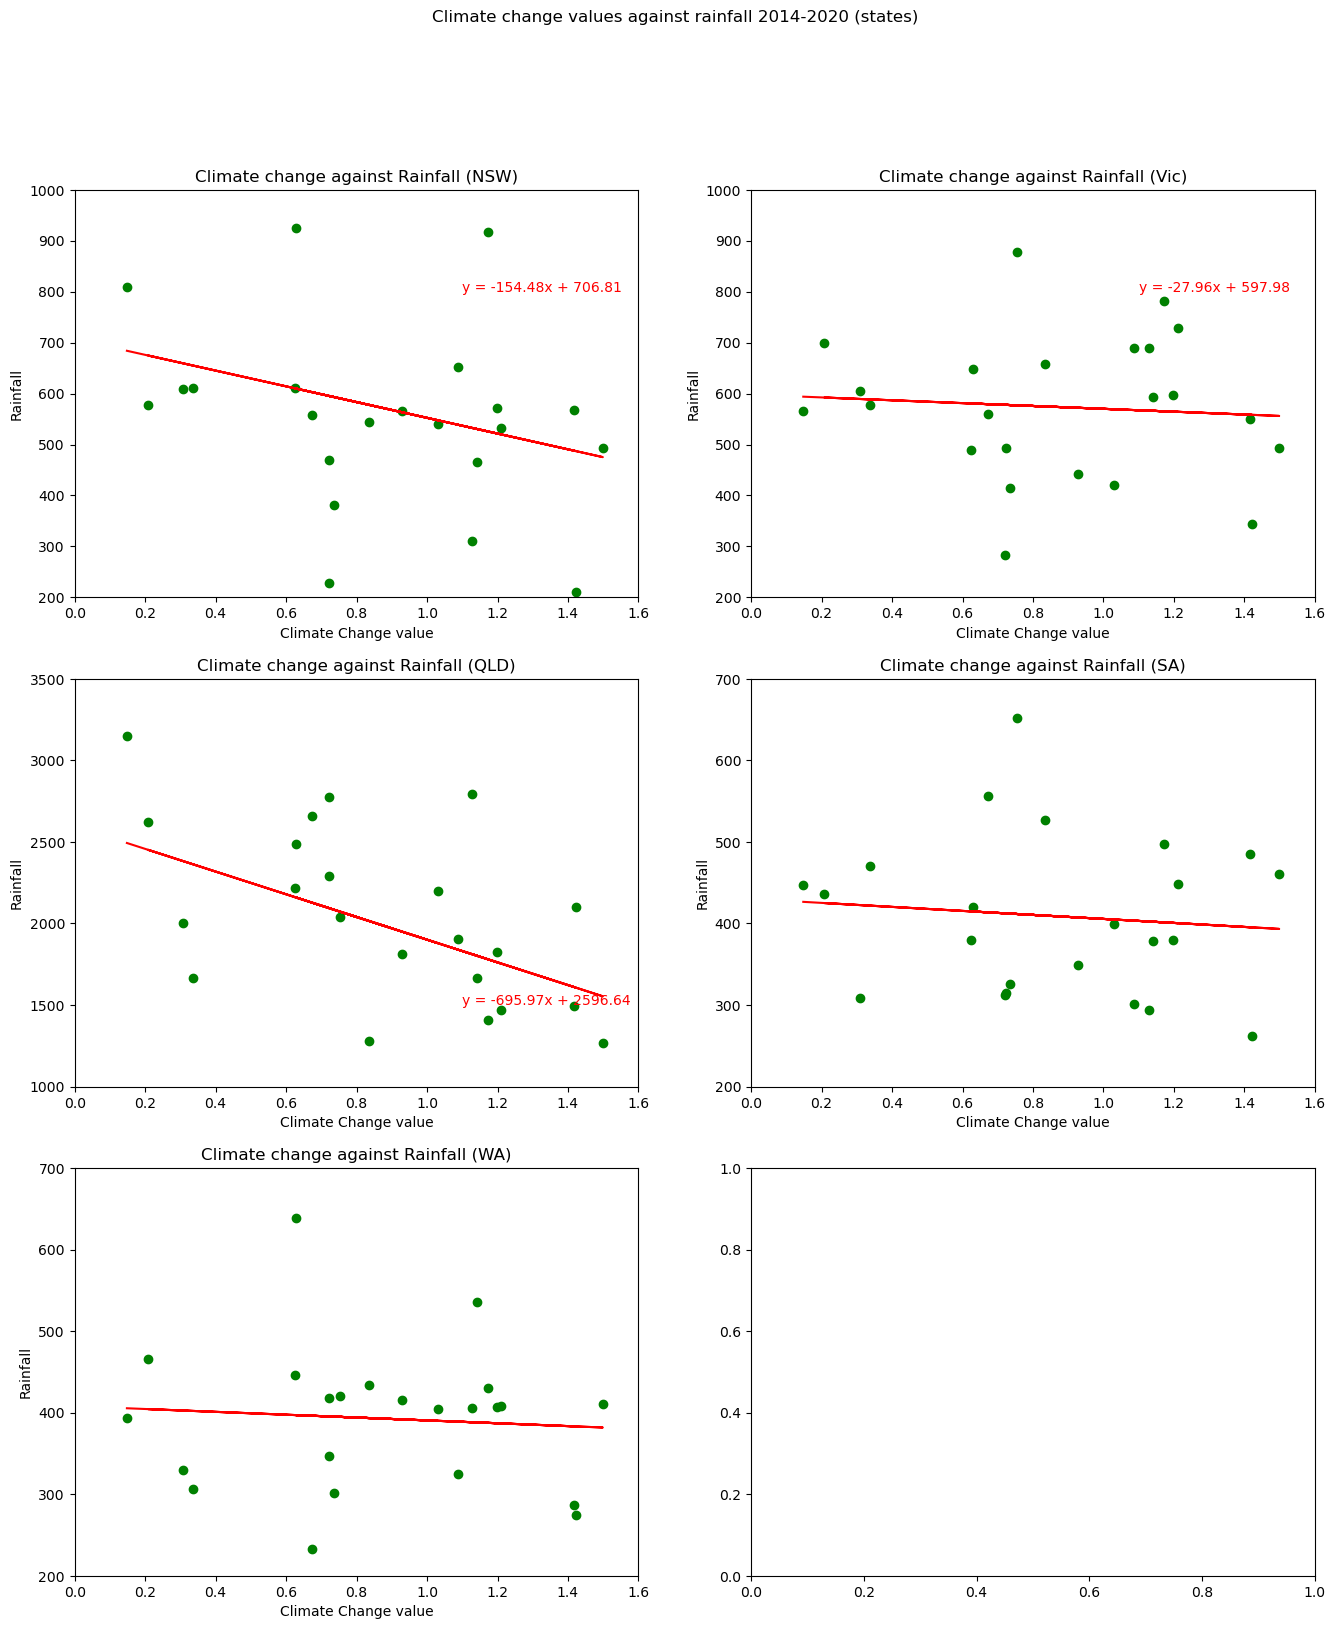

In [93]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Climate change values against rainfall 2014-2020 (states)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(cc_rain['Climate Change Value'], cc_rain['NSW Annual Rainfall'], c='green')
axs[0,0].set_title('Climate change against Rainfall (NSW)')
axs[0,0].set_ylabel('Rainfall')
axs[0,0].set_xlabel('Climate Change value')
axs[0,0].set_xlim(0, 1.6)
axs[0,0].set_ylim(200, 1000)

# NSW linear regression
nsw_x_values = cc_rain['Climate Change Value']
nsw_y_values = cc_rain['NSW Annual Rainfall']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(cc_rain['Climate Change Value'], cc_rain['VIC Annual Rainfall'], c='green')
axs[0,1].set_title('Climate change against Rainfall (Vic)')
axs[0,1].set_ylabel('Rainfall')
axs[0,1].set_xlabel('Climate Change value')
axs[0,1].set_xlim(0, 1.6)
axs[0,1].set_ylim(200, 1000)

# VIC linear regression
vic_x_values = cc_rain['Climate Change Value']
vic_y_values = cc_rain['VIC Annual Rainfall']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(cc_rain['Climate Change Value'], cc_rain['QL Annual Rainfall'], c='green')
axs[1,0].set_title('Climate change against Rainfall (QLD)')
axs[1,0].set_ylabel('Rainfall')
axs[1,0].set_xlabel('Climate Change value')
axs[1,0].set_xlim(0, 1.6)
axs[1,0].set_ylim(1000, 3500)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = cc_rain['Climate Change Value']
qld_y_values = cc_rain['QL Annual Rainfall']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(1.1,1500), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(cc_rain['Climate Change Value'], cc_rain['SA Annual Rainfall'], c='green')
axs[1,1].set_title('Climate change against Rainfall (SA)')
axs[1,1].set_ylabel('Rainfall')
axs[1,1].set_xlabel('Climate Change value')
axs[1,1].set_xlim(0, 1.6)
axs[1,1].set_ylim(200, 700)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = cc_rain['Climate Change Value']
sa_y_values = cc_rain['SA Annual Rainfall']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(cc_rain['Climate Change Value'], cc_rain['WA Annual Rainfall'], c='green')
axs[2,0].set_title('Climate change against Rainfall (WA)')
axs[2,0].set_ylabel('Rainfall')
axs[2,0].set_xlabel('Climate Change value')
axs[2,0].set_xlim(0, 1.6)
axs[2,0].set_ylim(200, 700)

# WA regression
wa_x_values = cc_rain['Climate Change Value']
wa_y_values = cc_rain['WA Annual Rainfall']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(1.1,800), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

In [94]:
#1.5 r-values
r_vic_ccRain = cc_rain['Climate Change Value'].corr(cc_rain['VIC Annual Rainfall'])
print(f"Vic r value (climate/rain) = {r_vic_ccRain}")

r_nsw_ccRain = cc_rain['Climate Change Value'].corr(cc_rain['NSW Annual Rainfall'])
print(f"NSW r value (climate/rain) = {r_nsw_ccRain}")

r_qld_ccRain = cc_rain['Climate Change Value'].corr(cc_rain['QL Annual Rainfall'])
print(f"QLD r value (climate/rain) = {r_qld_ccRain}")

r_wa_ccRain = cc_rain['Climate Change Value'].corr(cc_rain['WA Annual Rainfall'])
print(f"WA r value (climate/rain) = {r_wa_ccRain}")

r_sa_ccRain = cc_rain['Climate Change Value'].corr(cc_rain['SA Annual Rainfall'])
print(f"SA r value (climate/rain) = {r_sa_ccRain}")

Vic r value (climate/rain) = -0.07671526955748703
NSW r value (climate/rain) = -0.296505542545937
QLD r value (climate/rain) = -0.45812884830358025
WA r value (climate/rain) = -0.07668741368713161
SA r value (climate/rain) = -0.09850686886461399


## Question 2- Is there a link between wheat productivity in Aus and climate change values?

Setting up wheat production csv

In [77]:
# Reading the Wheat_StateByState.csv file
state_df = pd.read_csv("Resources/Wheat_StateByState_formatted.csv")
print(state_df)
year_range = np.arange(1.0,8.0,1.0)
print(year_range)

      Year  NSW_ha   NSW_kt  VIC_ha  VIC_kt  QLD_ha  QLD_kt   SA_ha   SA_kt  \
0  2017-18  2793.5   4702.8  1446.8  3682.1   639.2   765.4  1975.8  4052.0   
1  2018-19  2382.0   1850.3  1402.9  2276.6   419.7   419.7  1820.8  3024.5   
2  2019-20  2132.0   1772.4  1428.9  3714.3   441.5   418.5  1720.9  2689.1   
3  2020-21  4037.0  12972.2  1413.4  4525.0   966.1  1594.2  1831.0  3982.2   
4  2021-22  3607.7  12029.4  1444.6  4246.4   940.6  2222.4  2008.1  4750.1   
5  2022-23  3600.0  10620.0  1500.0  5392.9   980.0  2600.0  2200.0  7350.0   
6  2023-24  3300.0   6600.0  1540.4  4618.9   800.0  1100.0  2200.0  4900.0   

    WA_ha    WA_kt  TAS_ha  TAS_kt  
0  4056.6   7698.6     7.4    40.3  
1  4369.2   9979.2     7.6    40.1  
2  4132.7   5842.2     7.2    43.8  
3  4387.5   8792.7     8.2    56.3  
4  4718.0  12919.1     9.3    70.0  
5  4750.0  14500.0    15.0    82.5  
6  4650.0   8150.0    12.0    85.0  
[1. 2. 3. 4. 5. 6. 7.]


## 2.1.1 State wheat production

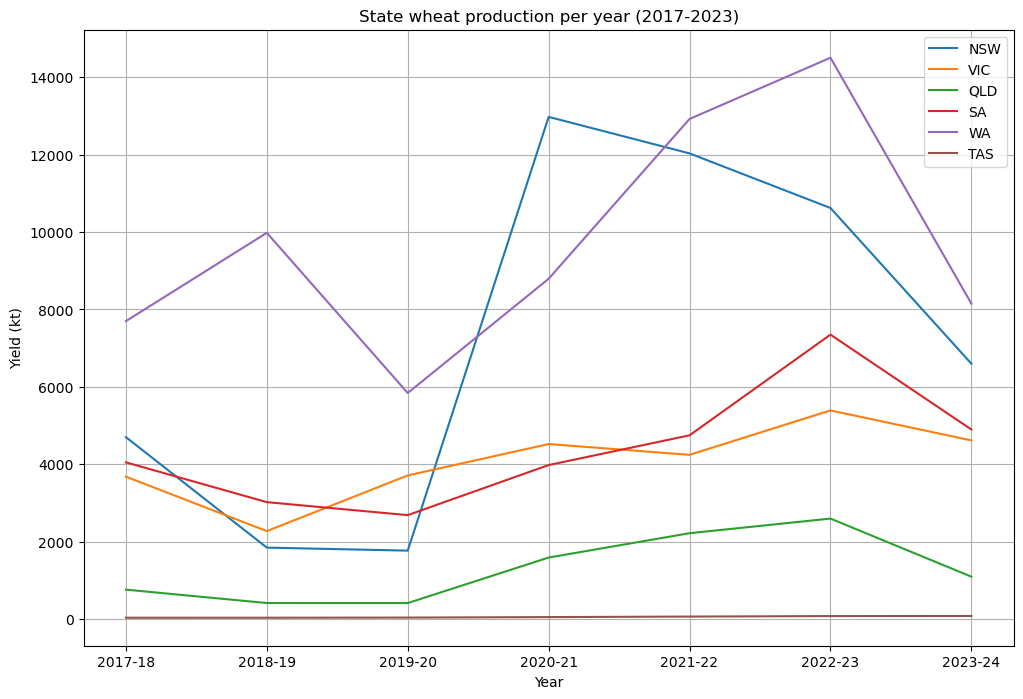

In [95]:
plt.figure(figsize=(12, 8))

# NSW graph
plt.plot(state_df['Year'], state_df['NSW_kt'], label='NSW')

# VIC graph
plt.plot(state_df['Year'], state_df['VIC_kt'], label='VIC')

# QLD graph
plt.plot(state_df['Year'], state_df['QLD_kt'], label='QLD')

# SA graph
plt.plot(state_df['Year'], state_df['SA_kt'], label='SA')

# WA graph
plt.plot(state_df['Year'], state_df['WA_kt'], label='WA')

# TAS graph
plt.plot(state_df['Year'], state_df['TAS_kt'], label='TAS')

plt.title('State wheat production per year (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Yield (kt)')
plt.legend()
plt.grid(True)

## 2.1.2 State Usage of land for wheat

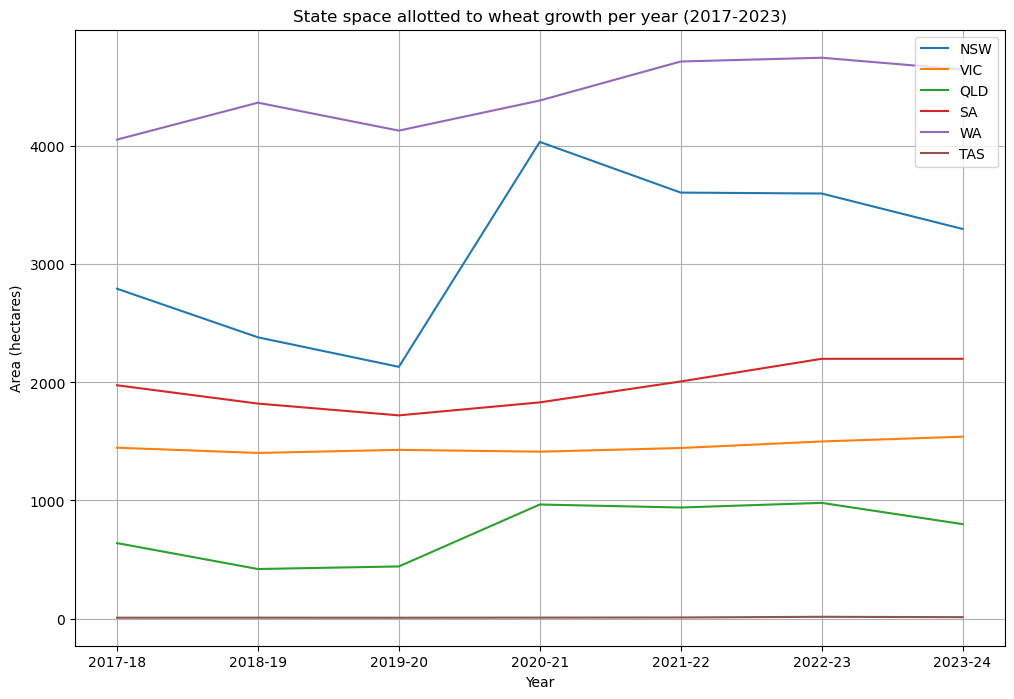

In [96]:
# Creating line graph for hectare use of wheat
plt.figure(figsize=(12, 8))

# NSW graph
plt.plot(state_df['Year'], state_df['NSW_ha'], label='NSW')

# VIC graph
plt.plot(state_df['Year'], state_df['VIC_ha'], label='VIC')

# QLD graph
plt.plot(state_df['Year'], state_df['QLD_ha'], label='QLD')

# SA graph
plt.plot(state_df['Year'], state_df['SA_ha'], label='SA')

# WA graph
plt.plot(state_df['Year'], state_df['WA_ha'], label='WA')

# TAS graph
plt.plot(state_df['Year'], state_df['TAS_ha'], label='TAS')

plt.title('State space allotted to wheat growth per year (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Area (hectares)')
plt.legend()
plt.grid(True)

## 2.2 Scatter series on Wheat Planting Area against Wheat Yield

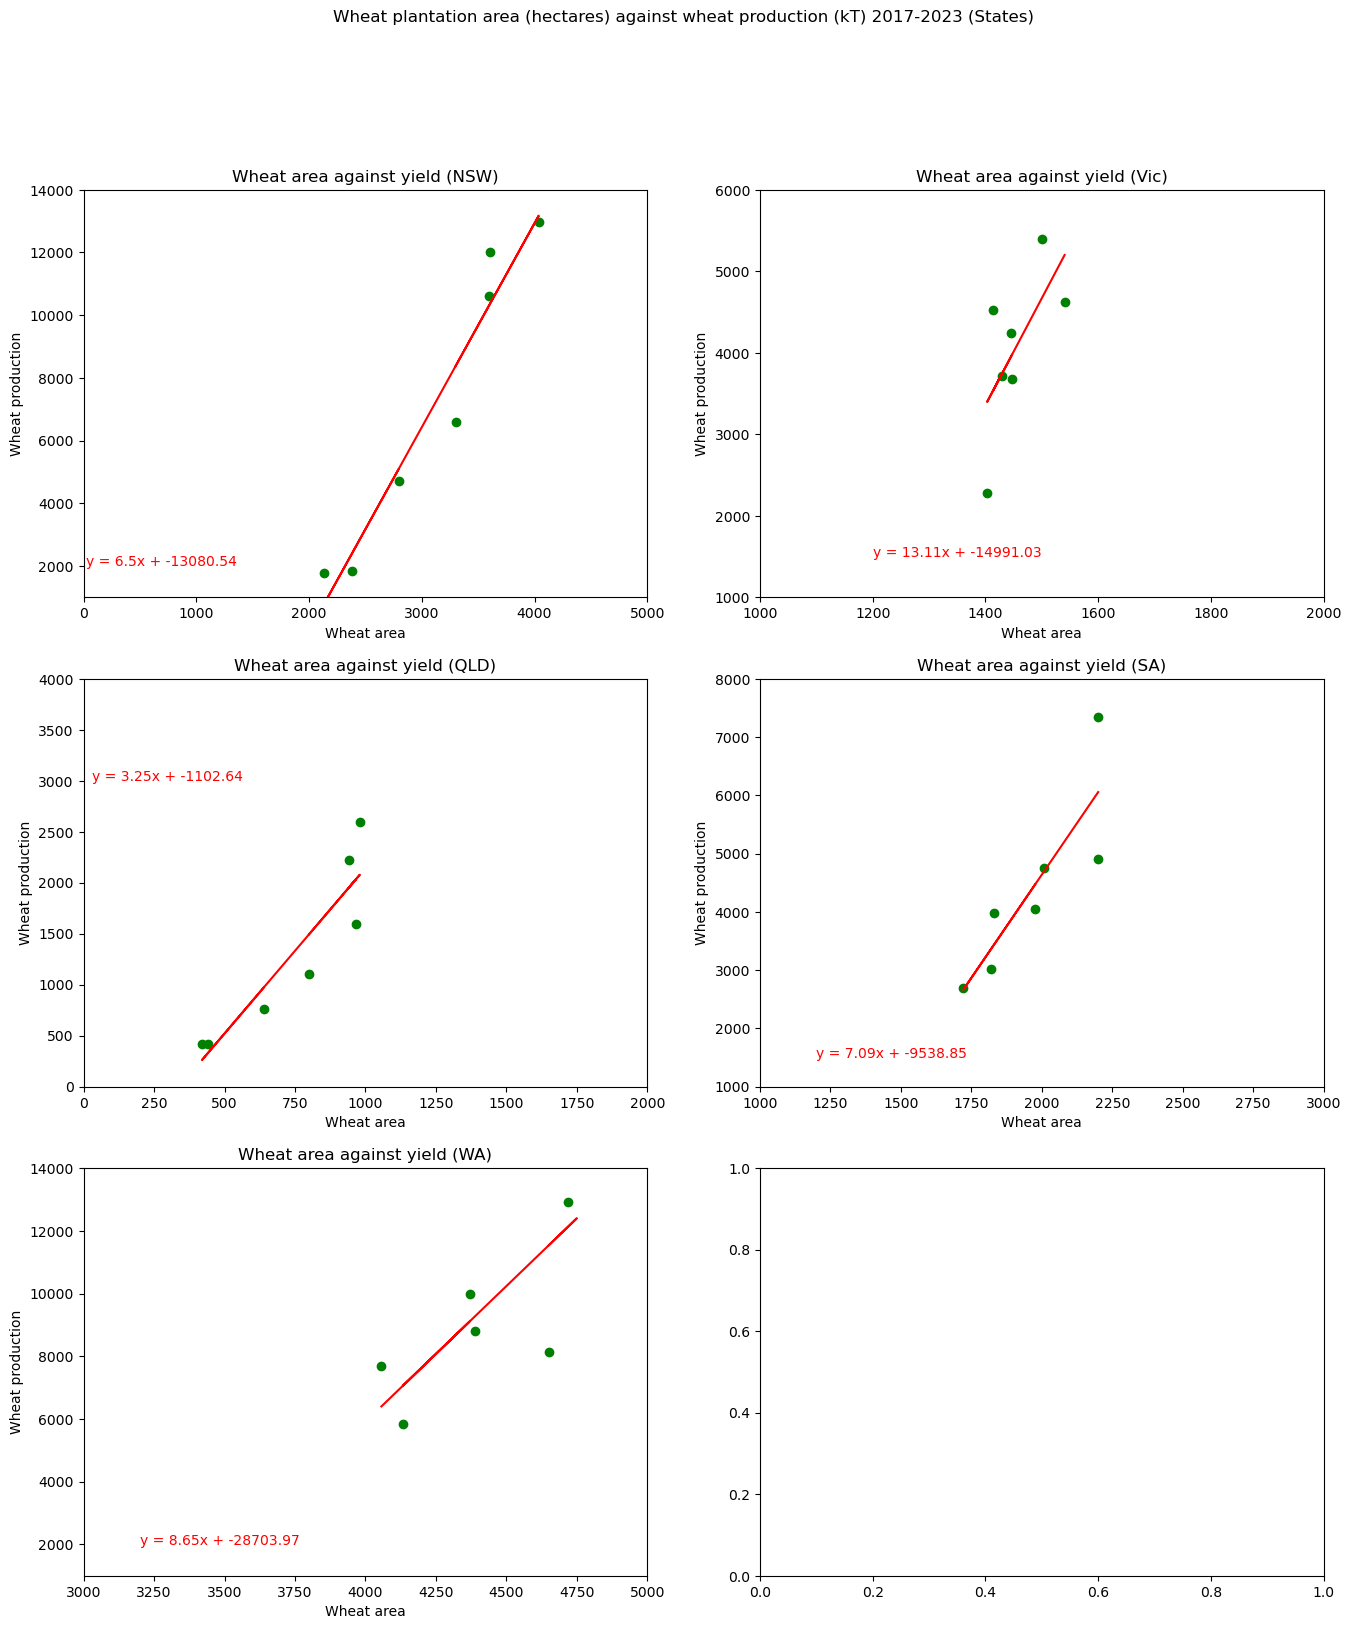

In [97]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Wheat plantation area (hectares) against wheat production (kT) 2017-2023 (States)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(state_df["NSW_ha"], state_df['NSW_kt'], c='green')
axs[0,0].set_title('Wheat area against yield (NSW)')
axs[0,0].set_ylabel('Wheat production')
axs[0,0].set_xlabel('Wheat area')
axs[0,0].set_xlim(0, 5000)
axs[0,0].set_ylim(1000, 14000)

# NSW linear regression
nsw_x_values = state_df['NSW_ha']
nsw_y_values = state_df['NSW_kt']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(23,2000), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(state_df["VIC_ha"], state_df['VIC_kt'], c='green')
axs[0,1].set_title('Wheat area against yield (Vic)')
axs[0,1].set_ylabel('Wheat production')
axs[0,1].set_xlabel('Wheat area')
axs[0,1].set_xlim(1000, 2000)
axs[0,1].set_ylim(1000, 6000)

# VIC linear regression
vic_x_values = state_df["VIC_ha"]
vic_y_values = state_df['VIC_kt']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(1200,1500), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(state_df["QLD_ha"], state_df['QLD_kt'], c='green')
axs[1,0].set_title('Wheat area against yield (QLD)')
axs[1,0].set_ylabel('Wheat production')
axs[1,0].set_xlabel('Wheat area')
axs[1,0].set_xlim(0, 2000)
axs[1,0].set_ylim(0, 4000)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = state_df["QLD_ha"]
qld_y_values = state_df['QLD_kt']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(29.5,3000), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(state_df["SA_ha"], state_df['SA_kt'], c='green')
axs[1,1].set_title('Wheat area against yield (SA)')
axs[1,1].set_ylabel('Wheat production')
axs[1,1].set_xlabel('Wheat area')
axs[1,1].set_xlim(1000, 3000)
axs[1,1].set_ylim(1000, 8000)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = state_df["SA_ha"]
sa_y_values = state_df['SA_kt']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(1200,1500), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(state_df["WA_ha"], state_df['WA_kt'], c='green')
axs[2,0].set_title('Wheat area against yield (WA)')
axs[2,0].set_ylabel('Wheat production')
axs[2,0].set_xlabel('Wheat area')
axs[2,0].set_xlim(3000, 5000)
axs[2,0].set_ylim(1000, 14000)

# WA regression
wa_x_values = state_df["WA_ha"]
wa_y_values = state_df['WA_kt']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(3200,2000), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

## 2.3 Scatter series on Wheat Yield against Climate Change Values

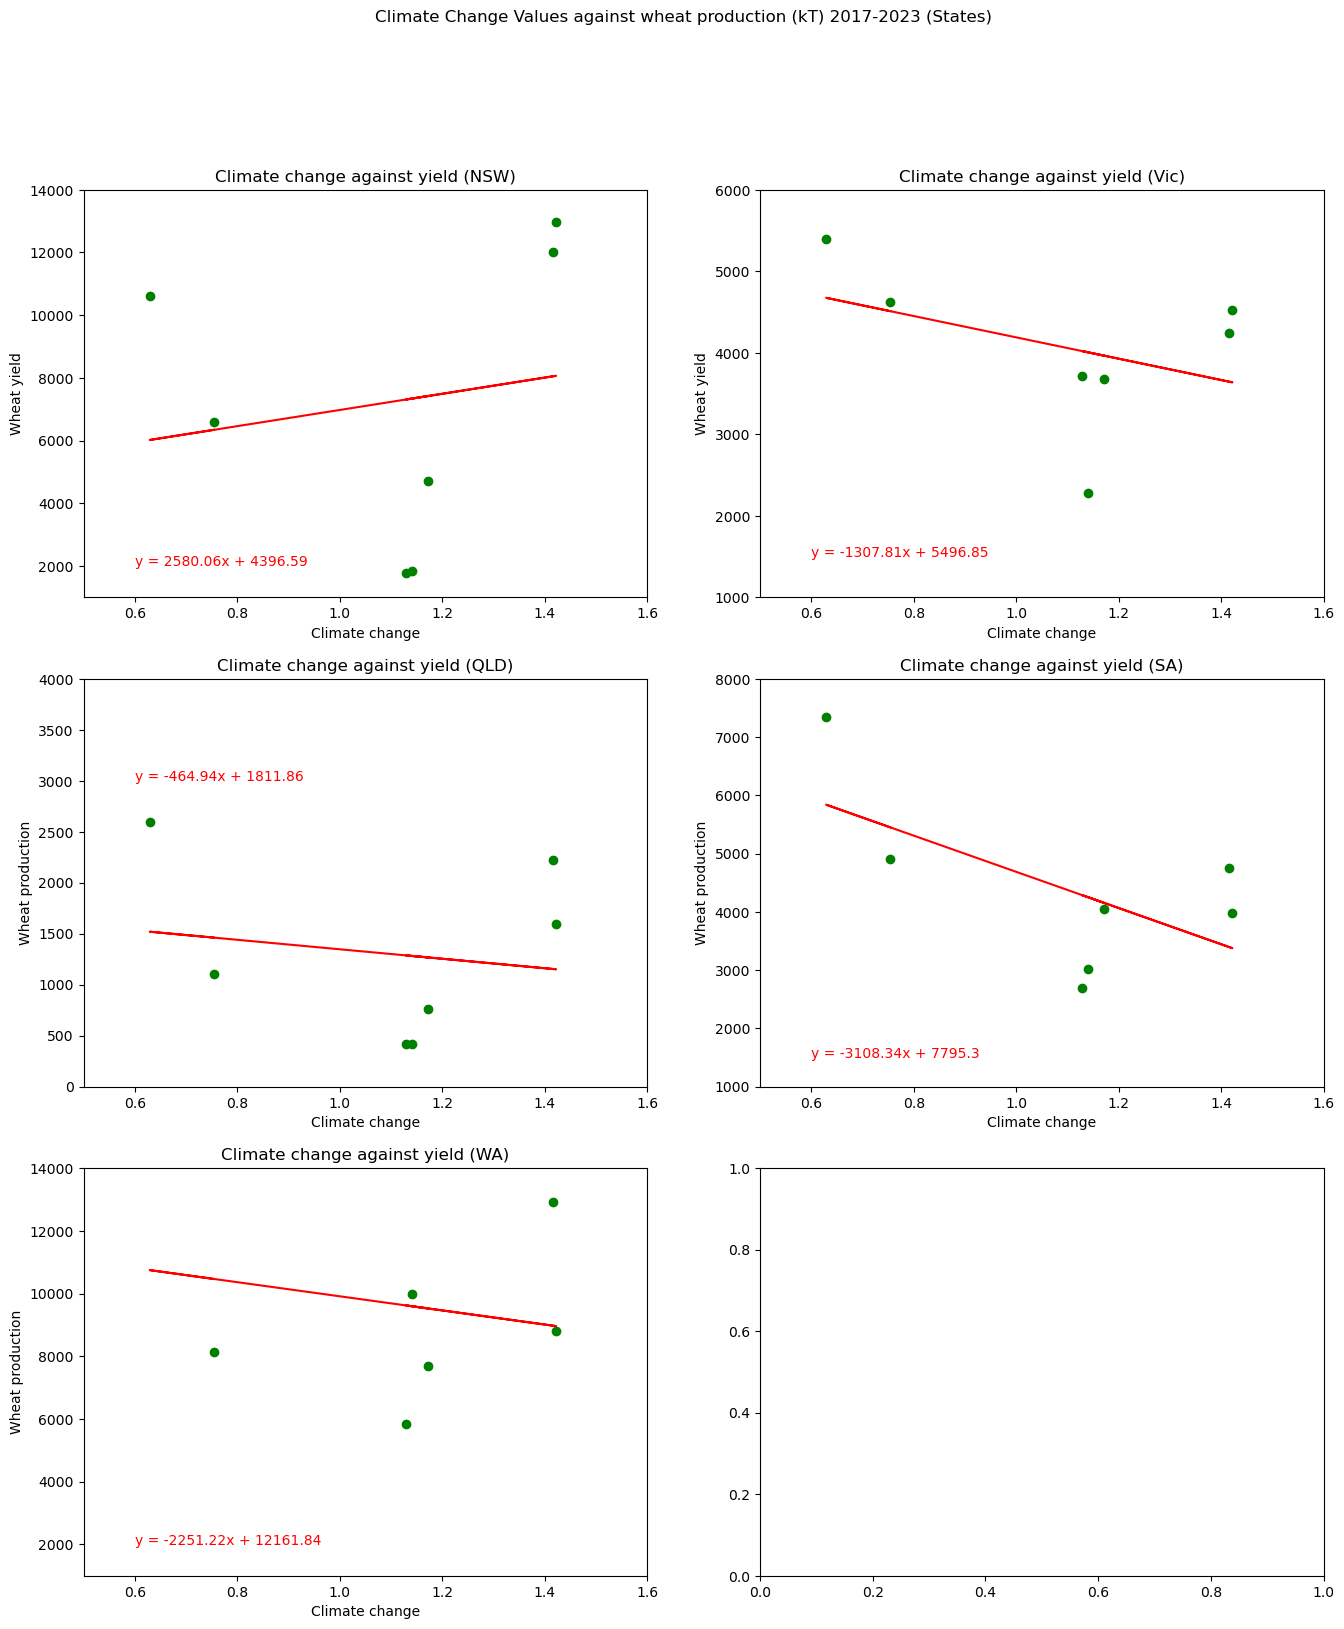

In [99]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Climate Change Values against wheat production (kT) 2017-2023 (States)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(climate_change_new_2017['Climate Change Value'], state_df['NSW_kt'], c='green')
axs[0,0].set_title('Climate change against yield (NSW)')
axs[0,0].set_ylabel('Wheat yield')
axs[0,0].set_xlabel('Climate change')
axs[0,0].set_xlim(0.5, 1.6)
axs[0,0].set_ylim(1000, 14000)

# NSW linear regression
nsw_x_values = climate_change_new_2017['Climate Change Value']
nsw_y_values = state_df['NSW_kt']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(0.6,2000), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(climate_change_new_2017['Climate Change Value'], state_df['VIC_kt'], c='green')
axs[0,1].set_title('Climate change against yield (Vic)')
axs[0,1].set_ylabel('Wheat yield')
axs[0,1].set_xlabel('Climate change')
axs[0,1].set_xlim(0.5, 1.6)
axs[0,1].set_ylim(1000, 6000)

# VIC linear regression
vic_x_values = climate_change_new_2017['Climate Change Value']
vic_y_values = state_df['VIC_kt']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(0.6,1500), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(climate_change_new_2017['Climate Change Value'], state_df['QLD_kt'], c='green')
axs[1,0].set_title('Climate change against yield (QLD)')
axs[1,0].set_ylabel('Wheat production')
axs[1,0].set_xlabel('Climate change')
axs[1,0].set_xlim(0.5, 1.6)
axs[1,0].set_ylim(0, 4000)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = climate_change_new_2017['Climate Change Value']
qld_y_values = state_df['QLD_kt']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(0.6,3000), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(climate_change_new_2017['Climate Change Value'], state_df['SA_kt'], c='green')
axs[1,1].set_title('Climate change against yield (SA)')
axs[1,1].set_ylabel('Wheat production')
axs[1,1].set_xlabel('Climate change')
axs[1,1].set_xlim(0.5, 1.6)
axs[1,1].set_ylim(1000, 8000)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = climate_change_new_2017['Climate Change Value']
sa_y_values = state_df['SA_kt']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(0.6,1500), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(climate_change_new_2017['Climate Change Value'], state_df['WA_kt'], c='green')
axs[2,0].set_title('Climate change against yield (WA)')
axs[2,0].set_ylabel('Wheat production')
axs[2,0].set_xlabel('Climate change')
axs[2,0].set_xlim(0.5, 1.6)
axs[2,0].set_ylim(1000, 14000)

# WA regression
wa_x_values = climate_change_new_2017['Climate Change Value']
wa_y_values = state_df['WA_kt']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(0.6,2000), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

## 2.4 Scatter series on Wheat Yield against Temperature

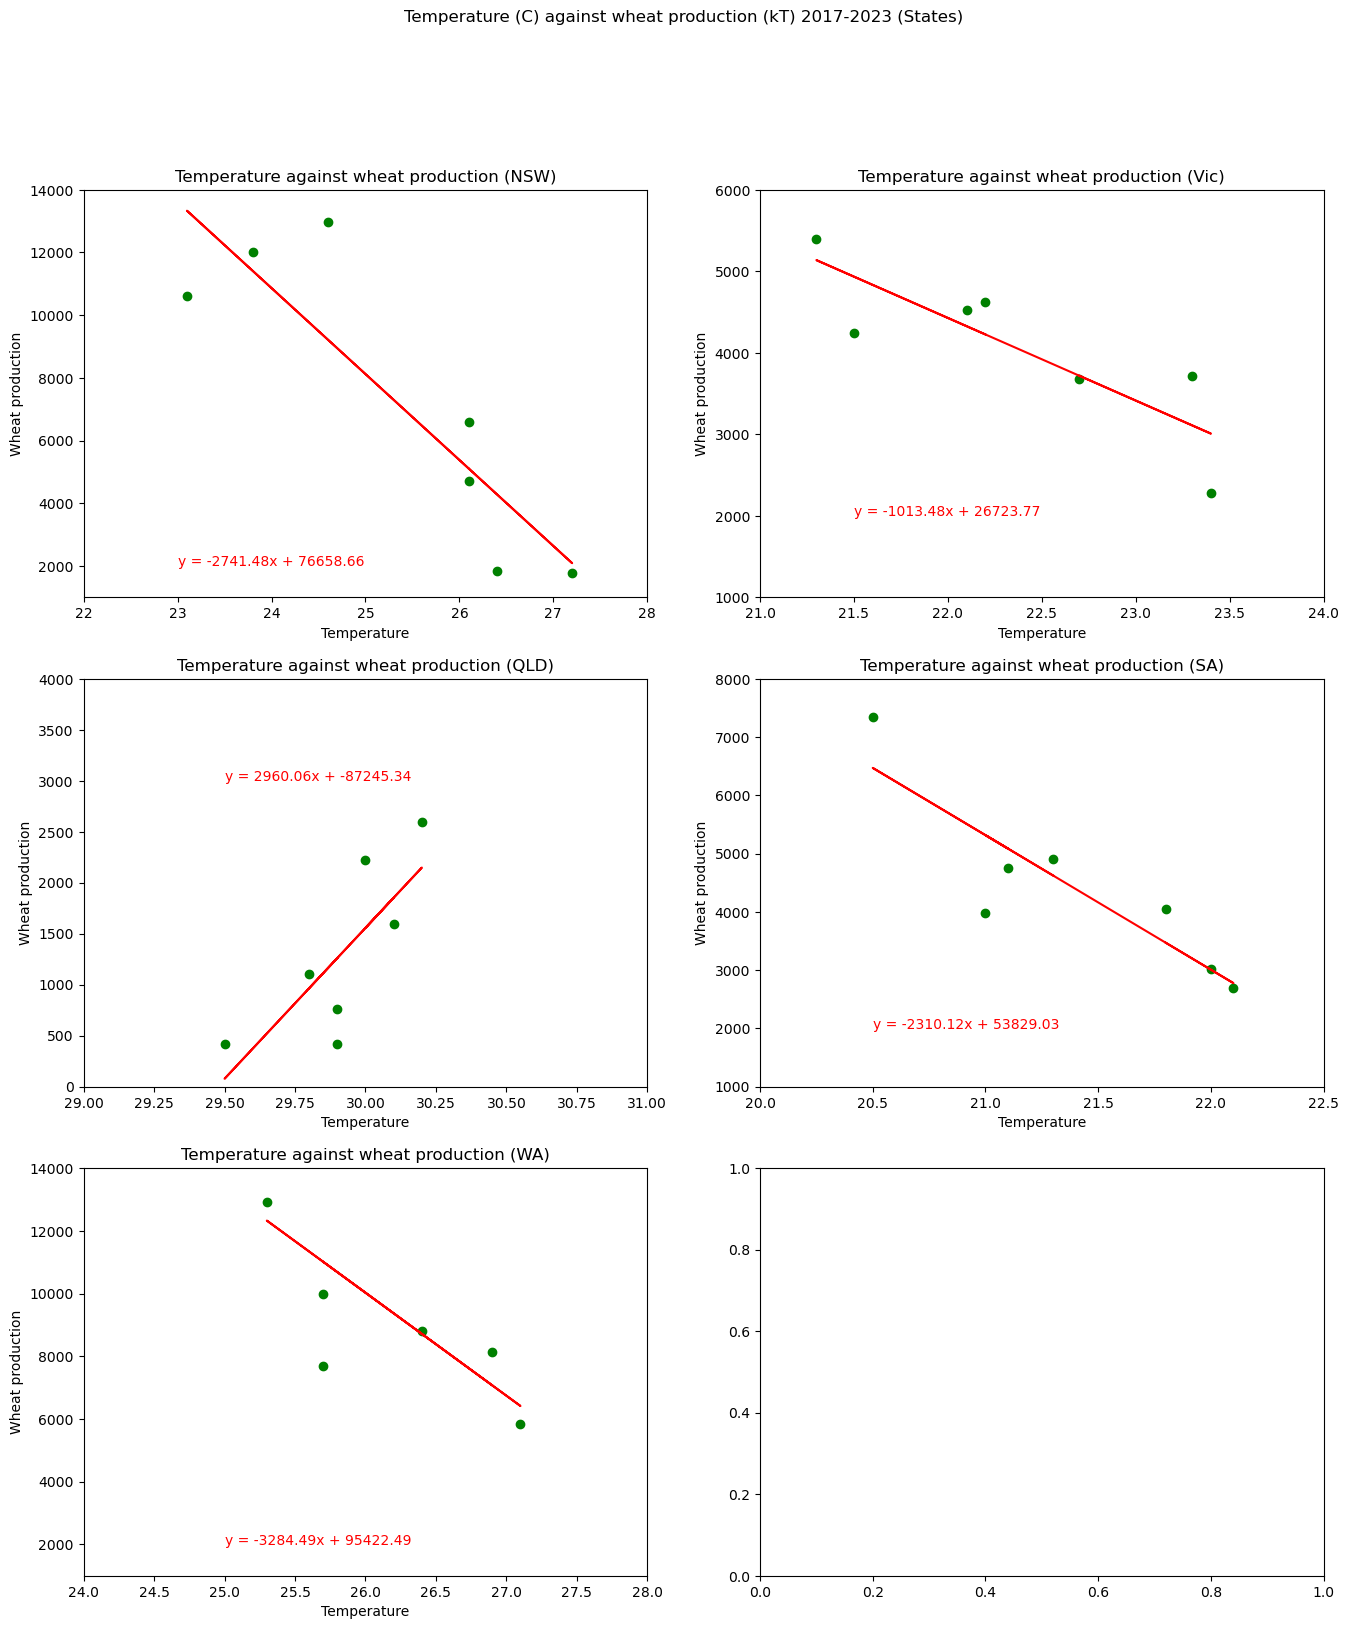

In [100]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Temperature (C) against wheat production (kT) 2017-2023 (States)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(temp_df_2017['NSW Annual Max Mean Temp'], state_df['NSW_kt'], c='green')
axs[0,0].set_title('Temperature against wheat production (NSW)')
axs[0,0].set_ylabel('Wheat production')
axs[0,0].set_xlabel('Temperature')
axs[0,0].set_xlim(22, 28)
axs[0,0].set_ylim(1000, 14000)

# NSW linear regression
nsw_x_values = temp_df_2017['NSW Annual Max Mean Temp']
nsw_y_values = state_df['NSW_kt']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(23,2000), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(temp_df_2017['VIC Annual Max Mean Temp'], state_df['VIC_kt'], c='green')
axs[0,1].set_title('Temperature against wheat production (Vic)')
axs[0,1].set_ylabel('Wheat production')
axs[0,1].set_xlabel('Temperature')
axs[0,1].set_xlim(21, 24)
axs[0,1].set_ylim(1000, 6000)

# VIC linear regression
vic_x_values = temp_df_2017['VIC Annual Max Mean Temp']
vic_y_values = state_df['VIC_kt']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(21.5,2000), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(temp_df_2017['QL Annual Max Mean Temp'], state_df['QLD_kt'], c='green')
axs[1,0].set_title('Temperature against wheat production (QLD)')
axs[1,0].set_ylabel('Wheat production')
axs[1,0].set_xlabel('Temperature')
axs[1,0].set_xlim(29, 31)
axs[1,0].set_ylim(0, 4000)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = temp_df_2017['QL Annual Max Mean Temp']
qld_y_values = state_df['QLD_kt']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(29.5,3000), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(temp_df_2017['SA Annual Max Mean Temp'], state_df['SA_kt'], c='green')
axs[1,1].set_title('Temperature against wheat production (SA)')
axs[1,1].set_ylabel('Wheat production')
axs[1,1].set_xlabel('Temperature')
axs[1,1].set_xlim(20, 22.5)
axs[1,1].set_ylim(1000, 8000)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = temp_df_2017['SA Annual Max Mean Temp']
sa_y_values = state_df['SA_kt']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(20.5,2000), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(temp_df_2017['WA Annual Max Mean Temp'], state_df['WA_kt'], c='green')
axs[2,0].set_title('Temperature against wheat production (WA)')
axs[2,0].set_ylabel('Wheat production')
axs[2,0].set_xlabel('Temperature')
axs[2,0].set_xlim(24, 28)
axs[2,0].set_ylim(1000, 14000)

# WA regression
wa_x_values = temp_df_2017['WA Annual Max Mean Temp']
wa_y_values = state_df['WA_kt']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(25,2000), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

## 2.5 Scatter series on Wheat Yield against Rainfall

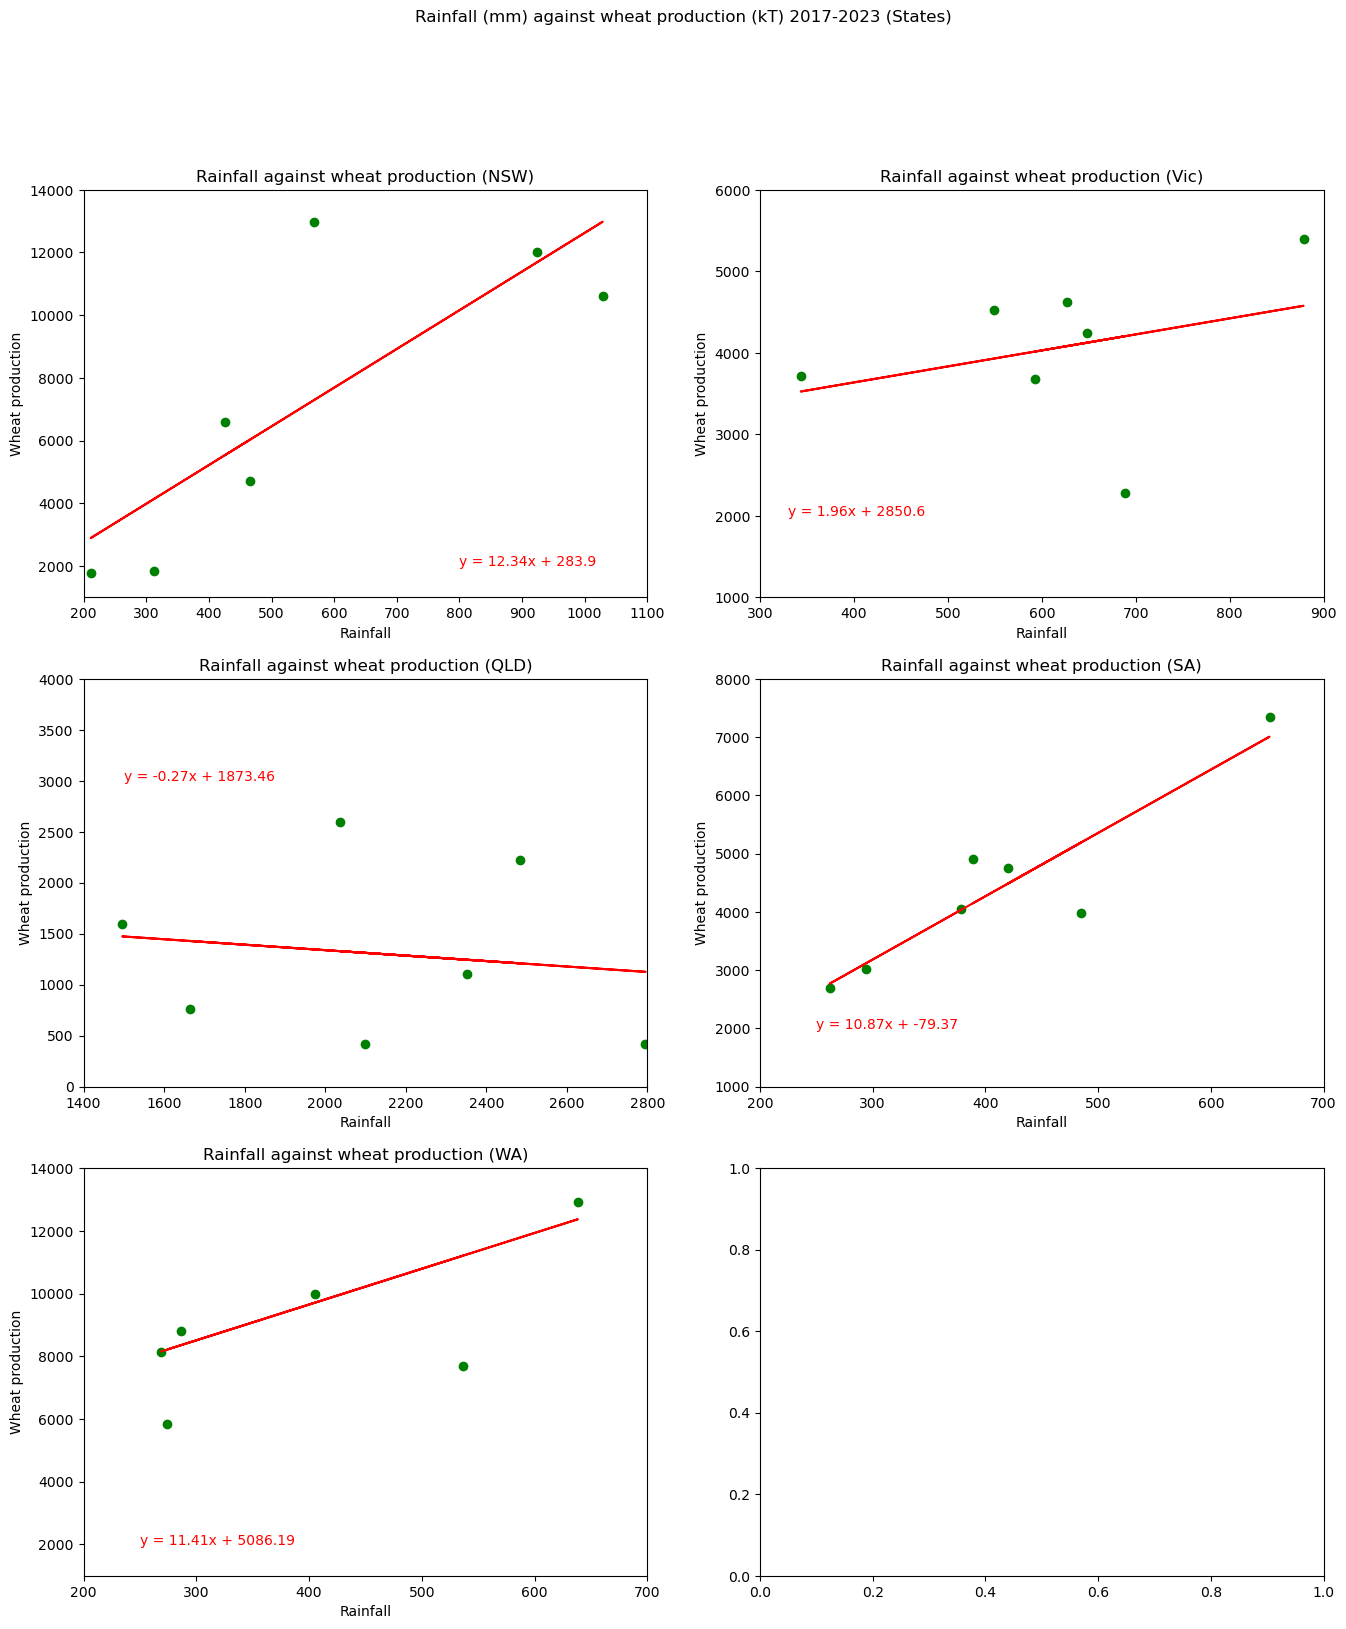

In [101]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Rainfall (mm) against wheat production (kT) 2017-2023 (States)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(rain_df_2017['NSW Annual Rainfall'], state_df['NSW_kt'], c='green')
axs[0,0].set_title('Rainfall against wheat production (NSW)')
axs[0,0].set_ylabel('Wheat production')
axs[0,0].set_xlabel('Rainfall')
axs[0,0].set_xlim(200, 1100)
axs[0,0].set_ylim(1000, 14000)

# NSW linear regression
nsw_x_values = rain_df_2017['NSW Annual Rainfall']
nsw_y_values = state_df['NSW_kt']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(800,2000), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(rain_df_2017['VIC Annual Rainfall'], state_df['VIC_kt'], c='green')
axs[0,1].set_title('Rainfall against wheat production (Vic)')
axs[0,1].set_ylabel('Wheat production')
axs[0,1].set_xlabel('Rainfall')
axs[0,1].set_xlim(300, 900)
axs[0,1].set_ylim(1000, 6000)

# VIC linear regression
vic_x_values = rain_df_2017['VIC Annual Rainfall']
vic_y_values = state_df['VIC_kt']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(330,2000), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(rain_df_2017['QL Annual Rainfall'], state_df['QLD_kt'], c='green')
axs[1,0].set_title('Rainfall against wheat production (QLD)')
axs[1,0].set_ylabel('Wheat production')
axs[1,0].set_xlabel('Rainfall')
axs[1,0].set_xlim(1400, 2800)
axs[1,0].set_ylim(0, 4000)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = rain_df_2017['QL Annual Rainfall']
qld_y_values = state_df['QLD_kt']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(1500,3000), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(rain_df_2017['SA Annual Rainfall'], state_df['SA_kt'], c='green')
axs[1,1].set_title('Rainfall against wheat production (SA)')
axs[1,1].set_ylabel('Wheat production')
axs[1,1].set_xlabel('Rainfall')
axs[1,1].set_xlim(200, 700)
axs[1,1].set_ylim(1000, 8000)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = rain_df_2017['SA Annual Rainfall']
sa_y_values = state_df['SA_kt']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(250,2000), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(rain_df_2017['WA Annual Rainfall'], state_df['WA_kt'], c='green')
axs[2,0].set_title('Rainfall against wheat production (WA)')
axs[2,0].set_ylabel('Wheat production')
axs[2,0].set_xlabel('Rainfall')
axs[2,0].set_xlim(200, 700)
axs[2,0].set_ylim(1000, 14000)

# WA regression
wa_x_values = rain_df_2017['WA Annual Rainfall']
wa_y_values = state_df['WA_kt']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(250,2000), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

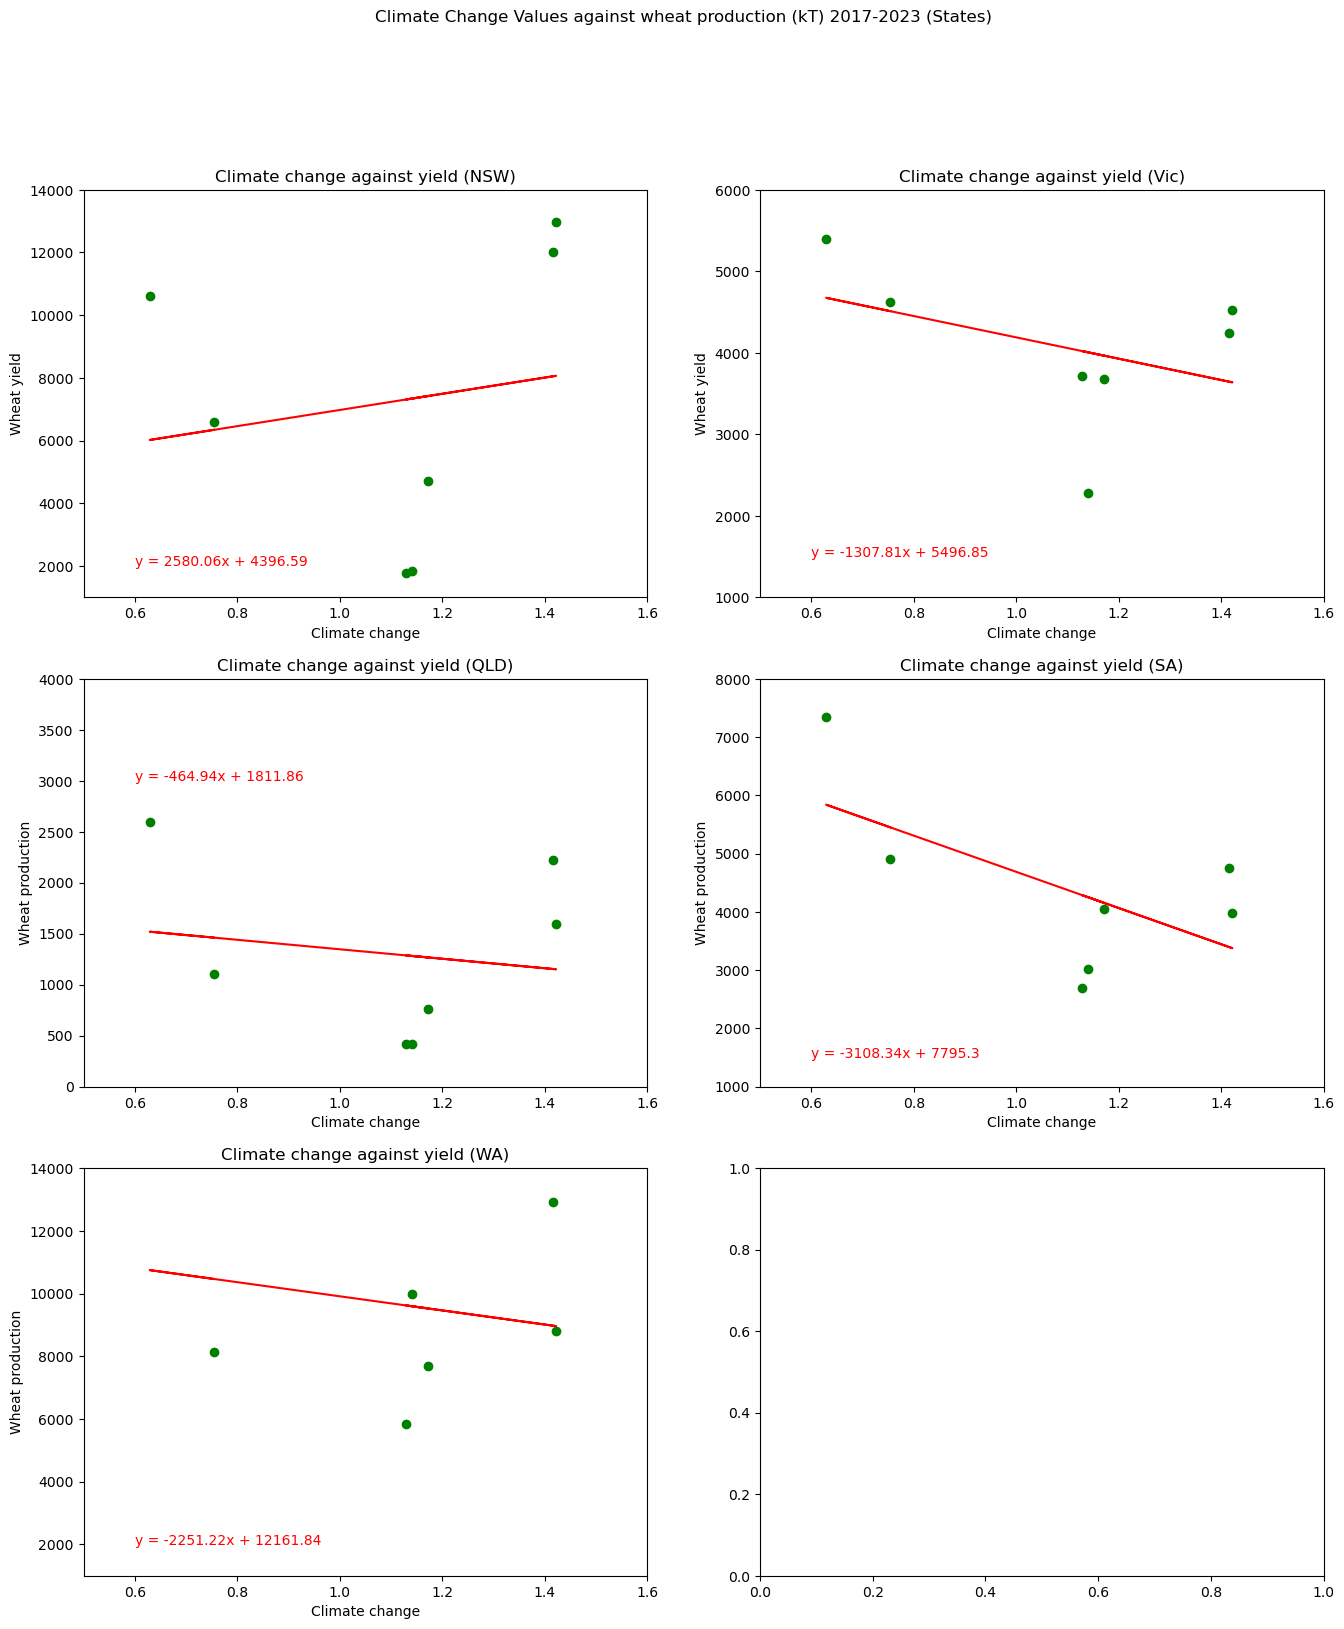

In [98]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('Climate Change Values against wheat production (kT) 2017-2023 (States)')
fig.set_figheight(18)
fig.set_figwidth(16)

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(climate_change_new_2017['Climate Change Value'], state_df['NSW_kt'], c='green')
axs[0,0].set_title('Climate change against yield (NSW)')
axs[0,0].set_ylabel('Wheat yield')
axs[0,0].set_xlabel('Climate change')
axs[0,0].set_xlim(0.5, 1.6)
axs[0,0].set_ylim(1000, 14000)

# NSW linear regression
nsw_x_values = climate_change_new_2017['Climate Change Value']
nsw_y_values = state_df['NSW_kt']
(nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
nsw_regress = nsw_x_values * nsw_slope + nsw_intercept
axs[0,0].annotate(f"y = {round(nsw_slope,2)}x + {round(nsw_intercept,2)}", xy=(0.6,2000), xycoords='data', color='red')
axs[0,0].plot(nsw_x_values,nsw_regress,"r-")

#------

# VIC graph
axs[0,1].scatter(climate_change_new_2017['Climate Change Value'], state_df['VIC_kt'], c='green')
axs[0,1].set_title('Climate change against yield (Vic)')
axs[0,1].set_ylabel('Wheat yield')
axs[0,1].set_xlabel('Climate change')
axs[0,1].set_xlim(0.5, 1.6)
axs[0,1].set_ylim(1000, 6000)

# VIC linear regression
vic_x_values = climate_change_new_2017['Climate Change Value']
vic_y_values = state_df['VIC_kt']
(vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(vic_x_values, vic_y_values)
vic_regress = vic_x_values * vic_slope + vic_intercept
axs[0,1].annotate(f"y = {round(vic_slope,2)}x + {round(vic_intercept,2)}", xy=(0.6,1500), xycoords='data', color='red')
axs[0,1].plot(vic_x_values,vic_regress,"r-")


#------
# QLD graph
axs[1,0].scatter(climate_change_new_2017['Climate Change Value'], state_df['QLD_kt'], c='green')
axs[1,0].set_title('Climate change against yield (QLD)')
axs[1,0].set_ylabel('Wheat production')
axs[1,0].set_xlabel('Climate change')
axs[1,0].set_xlim(0.5, 1.6)
axs[1,0].set_ylim(0, 4000)

# QLD linear regression (uncomment the section below once fixed)
qld_x_values = climate_change_new_2017['Climate Change Value']
qld_y_values = state_df['QLD_kt']
(qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(qld_x_values, qld_y_values)
qld_regress = qld_x_values * qld_slope + qld_intercept
axs[1,0].annotate(f"y = {round(qld_slope,2)}x + {round(qld_intercept,2)}", xy=(0.6,3000), xycoords='data', color='red')
axs[1,0].plot(qld_x_values,qld_regress,"r-")


#------
# SA graph
axs[1,1].scatter(climate_change_new_2017['Climate Change Value'], state_df['SA_kt'], c='green')
axs[1,1].set_title('Climate change against yield (SA)')
axs[1,1].set_ylabel('Wheat production')
axs[1,1].set_xlabel('Climate change')
axs[1,1].set_xlim(0.5, 1.6)
axs[1,1].set_ylim(1000, 8000)

# SA linear regression (uncomment the section below once fixed)
sa_x_values = climate_change_new_2017['Climate Change Value']
sa_y_values = state_df['SA_kt']
(sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(sa_x_values, sa_y_values)
sa_regress = sa_x_values * sa_slope + sa_intercept
axs[1,1].annotate(f"y = {round(sa_slope,2)}x + {round(sa_intercept,2)}", xy=(0.6,1500), xycoords='data', color='red')
axs[1,1].plot(sa_x_values,sa_regress,"r-")

#------

# WA graph
axs[2,0].scatter(climate_change_new_2017['Climate Change Value'], state_df['WA_kt'], c='green')
axs[2,0].set_title('Climate change against yield (WA)')
axs[2,0].set_ylabel('Wheat production')
axs[2,0].set_xlabel('Climate change')
axs[2,0].set_xlim(0.5, 1.6)
axs[2,0].set_ylim(1000, 14000)

# WA regression
wa_x_values = climate_change_new_2017['Climate Change Value']
wa_y_values = state_df['WA_kt']
(wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(wa_x_values, wa_y_values)
wa_regress = wa_x_values * wa_slope + wa_intercept
axs[2,0].annotate(f"y = {round(wa_slope,2)}x + {round(wa_intercept,2)}", xy=(0.6,2000), xycoords='data', color='red')
axs[2,0].plot(wa_x_values,wa_regress,"r-")

### Climate Change and its effect on Production and Export

The following code will compare climate change and its effect on production and export data

In [85]:
gmr_export_data = pd.read_csv('Resources/GMR_Summary.csv')
gmr_export_data = gmr_export_data.drop(columns=['Opening Stocks', 'Imports', 'Total Supply', 'Food Use', 'Industrial Use', 'Feed Use', 'Closing stocks'])
gmr_export_data = gmr_export_data[::-1] # reordering to make the lowest year the first value

#climate_export_data = gmr_export_data.merge(climate_change_new_2017, how='outer', on='Year')
#climate_export_data
gmr_export_data

,Year,Production,Total Use,Exports
6,2017-18,20.941,7.950000,13.900
5,2018-19,17.598,9.070000,9.000
4,2019-20,14.480,8.330000,9.139
3,2020-21,31.923,7.272000,23.816
2,2021-22,27.900,8.200763,21.000
1,2022-23,39.190,8.183597,31.500
0,2023-24,36.237,8.722000,27.599


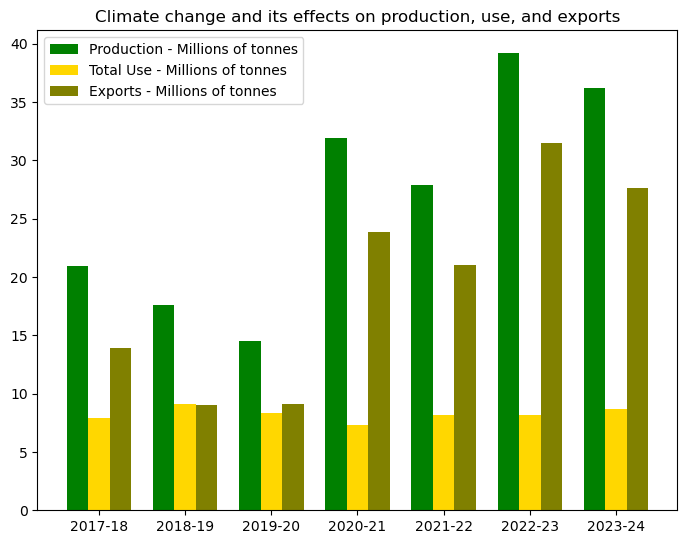

In [86]:
x_values = np.arange(0,7,1)
y_values = [gmr_export_data['Production'], gmr_export_data['Total Use'], gmr_export_data['Exports']]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_values + -0.25, y_values[0], color='Green', width=0.25)
ax.bar(x_values + 0.00, y_values[1], color='Gold', width=0.25)
ax.bar(x_values + 0.25, y_values[2], color='Olive', width=0.25)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24'])
ax.set_title('Climate change and its effects on production, use, and exports')


plt.legend(['Production - Millions of tonnes', 'Total Use - Millions of tonnes', 'Exports - Millions of tonnes'])

plt.show()


### Temperature vs state

This code will show the temperature for each state per year with the temperature range for optimal plant growth highlighted

Temperature against climate change

Climate Change against Rainfall